# Advance Python Project Assignment:

### 1. Build a Flask app that scrapes data from multiple websites and displays it on your site. You can try to scrap websites like youtube , amazon and show data on output pages and deploy it on cloud platform .

- **app.py**
```python
# Import all necessary modules
from flask import Flask, render_template, request
from bs4 import BeautifulSoup
import requests

# Create a Flask object
app = Flask(__name__)


# Function to scrape images from Google Images
def scrape_google(query):
    url = f"https://www.google.com/search?q={query}&sca_esv=596606957&rlz=1C1RXQR_enIN1071IN1072&hl=en&tbm=isch&sxsrf=ACQVn09cyEzEi-mWW1ZpYDfSnw6aQt4NKw:1704735874067&source=lnms&sa=X&ved=2ahUKEwizn9aBrM6DAxWqSGwGHfSEBF0Q_AUoA3oECAEQBQ&cshid=1704736043500682&biw=1536&bih=703&dpr=1.25"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract image sources from the 'img' tags in the HTML
    images = [img['src'] for img in soup.find_all('img')][1:]
    return images


# Function to scrape images from wallpapers.com
def scrape_wallpapers(query):
    images = []
    # Loop through multiple pages (1 to 5) on wallpapers.com
    for i in range(1, 6):
        url = f"https://wallpapers.com/search/{query}?p={i}"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract image sources from the 'img' tags with class 'promote'
        images.extend([f"https://wallpapers.com{img['data-src']}" for img in soup.find_all('img', 'promote')])
    return images


# Route for the homepage
@app.route('/')
def load_page():
    return render_template('index.html')


# Route for handling search requests
@app.route('/search', methods=['GET', 'POST'])
def search():
    # Get the search query from the form submission
    query = request.form.get('query')
    # Call the scraping functions to get image results
    google_results = scrape_google(query)
    wallpapers_results = scrape_wallpapers(query)
    # Render the result.html template with the query and image results
    return render_template('result.html', query=query, google_results=google_results, wallpapers_results=wallpapers_results)


# Run the Flask app
if __name__ == '__main__':
    app.run()
```

<br>

- **index.html**
```html
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Scraping App</title>
</head>

<body>
    <h1>Image Scraping App</h1>
    <form action="/search" method="post">
        <label for="query">Enter keyword:</label>
        <input type="text" name="query" id="query" required>
        <button type="submit">Search</button>
    </form>
</body>

</html>
```

<br>

- **result.html**
```html
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Search Results</title>
</head>

<body>
    <h1>Search Results for "{{ query }}"</h1>

    <h2>Wallpapers.com Results:</h2>
    <div>
        {% for result in wallpapers_results %}
            <img src="{{ result }}" alt="Wallpapers.com Image" width="370" height="250">
        {% endfor %}
    </div>
    
    <h2>Google Results:</h2>
    <div>
        {% for result in google_results %}
            <img src="{{ result }}" alt="Google Image" width="370" height="250">
        {% endfor %}
    </div>

    
</body>

</html>
```

<br>

- **Output**

<div style="width: 800px;">

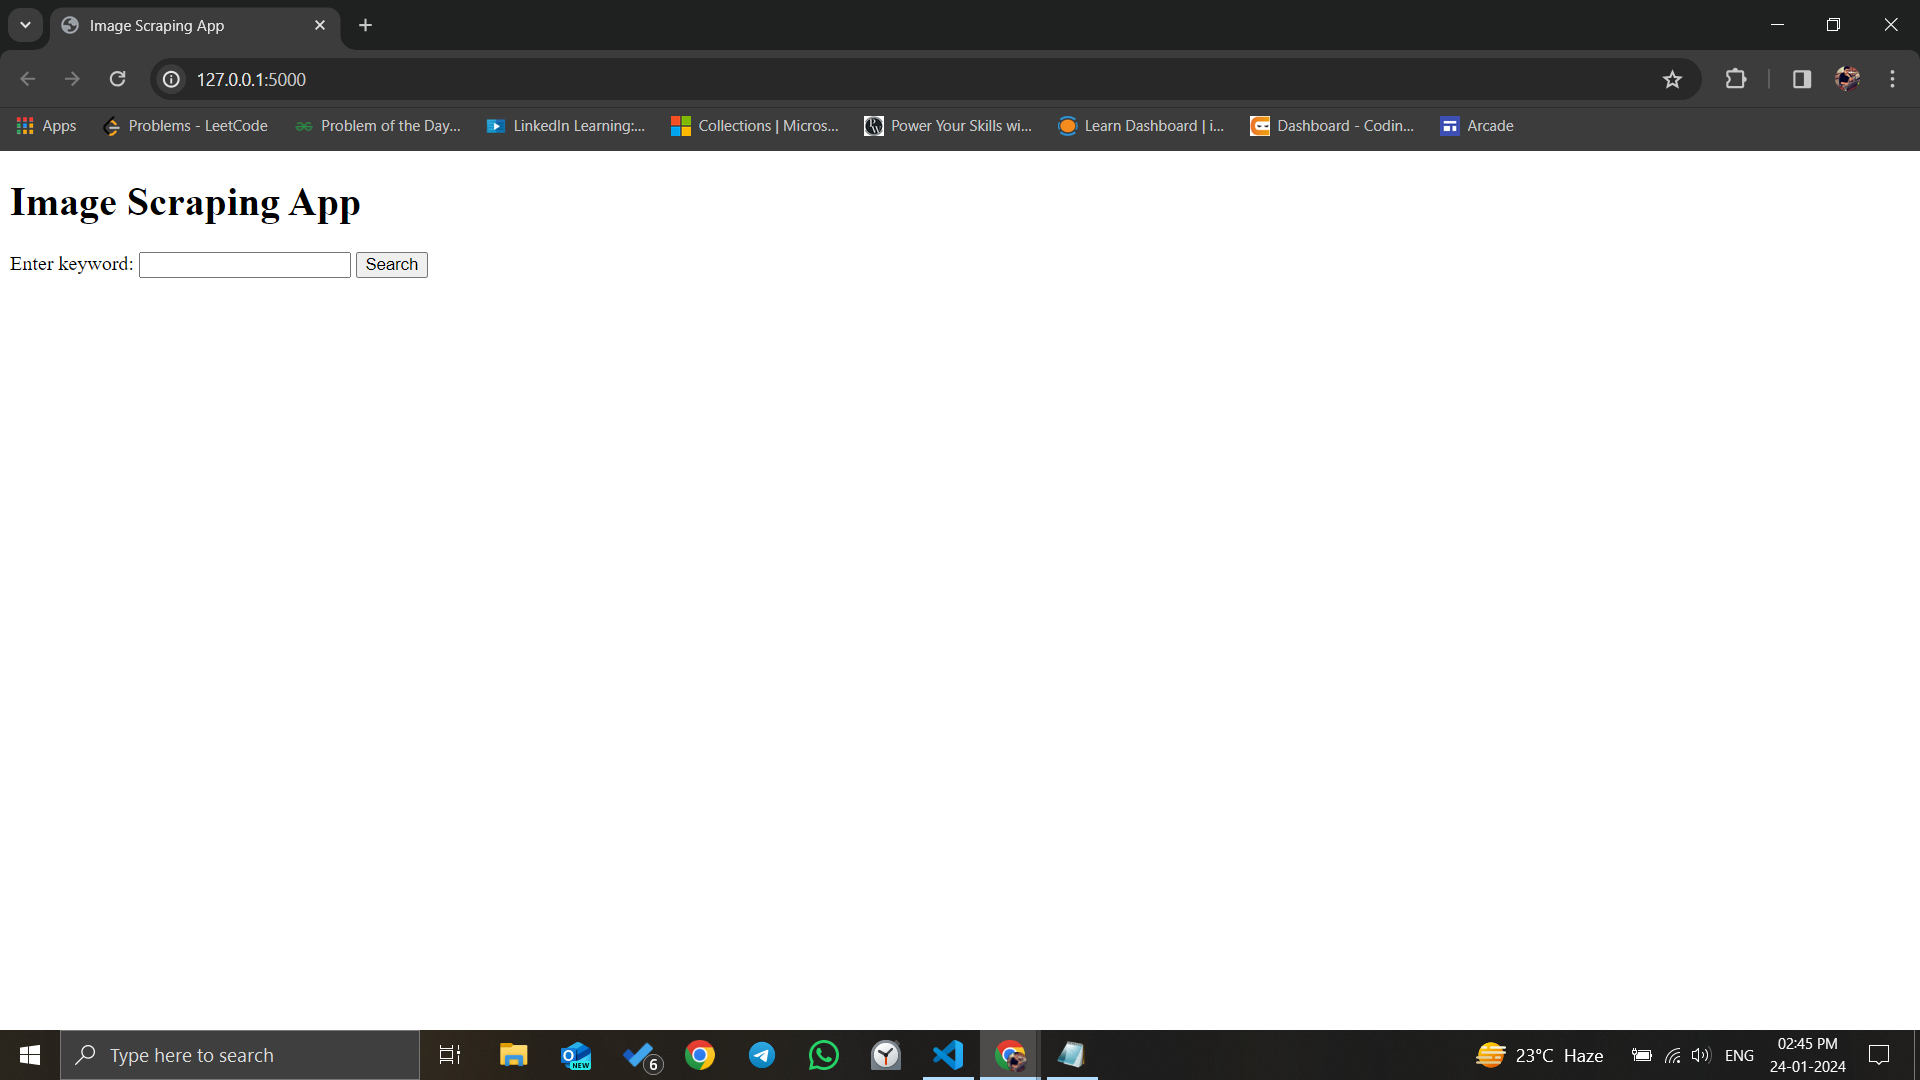

<br>

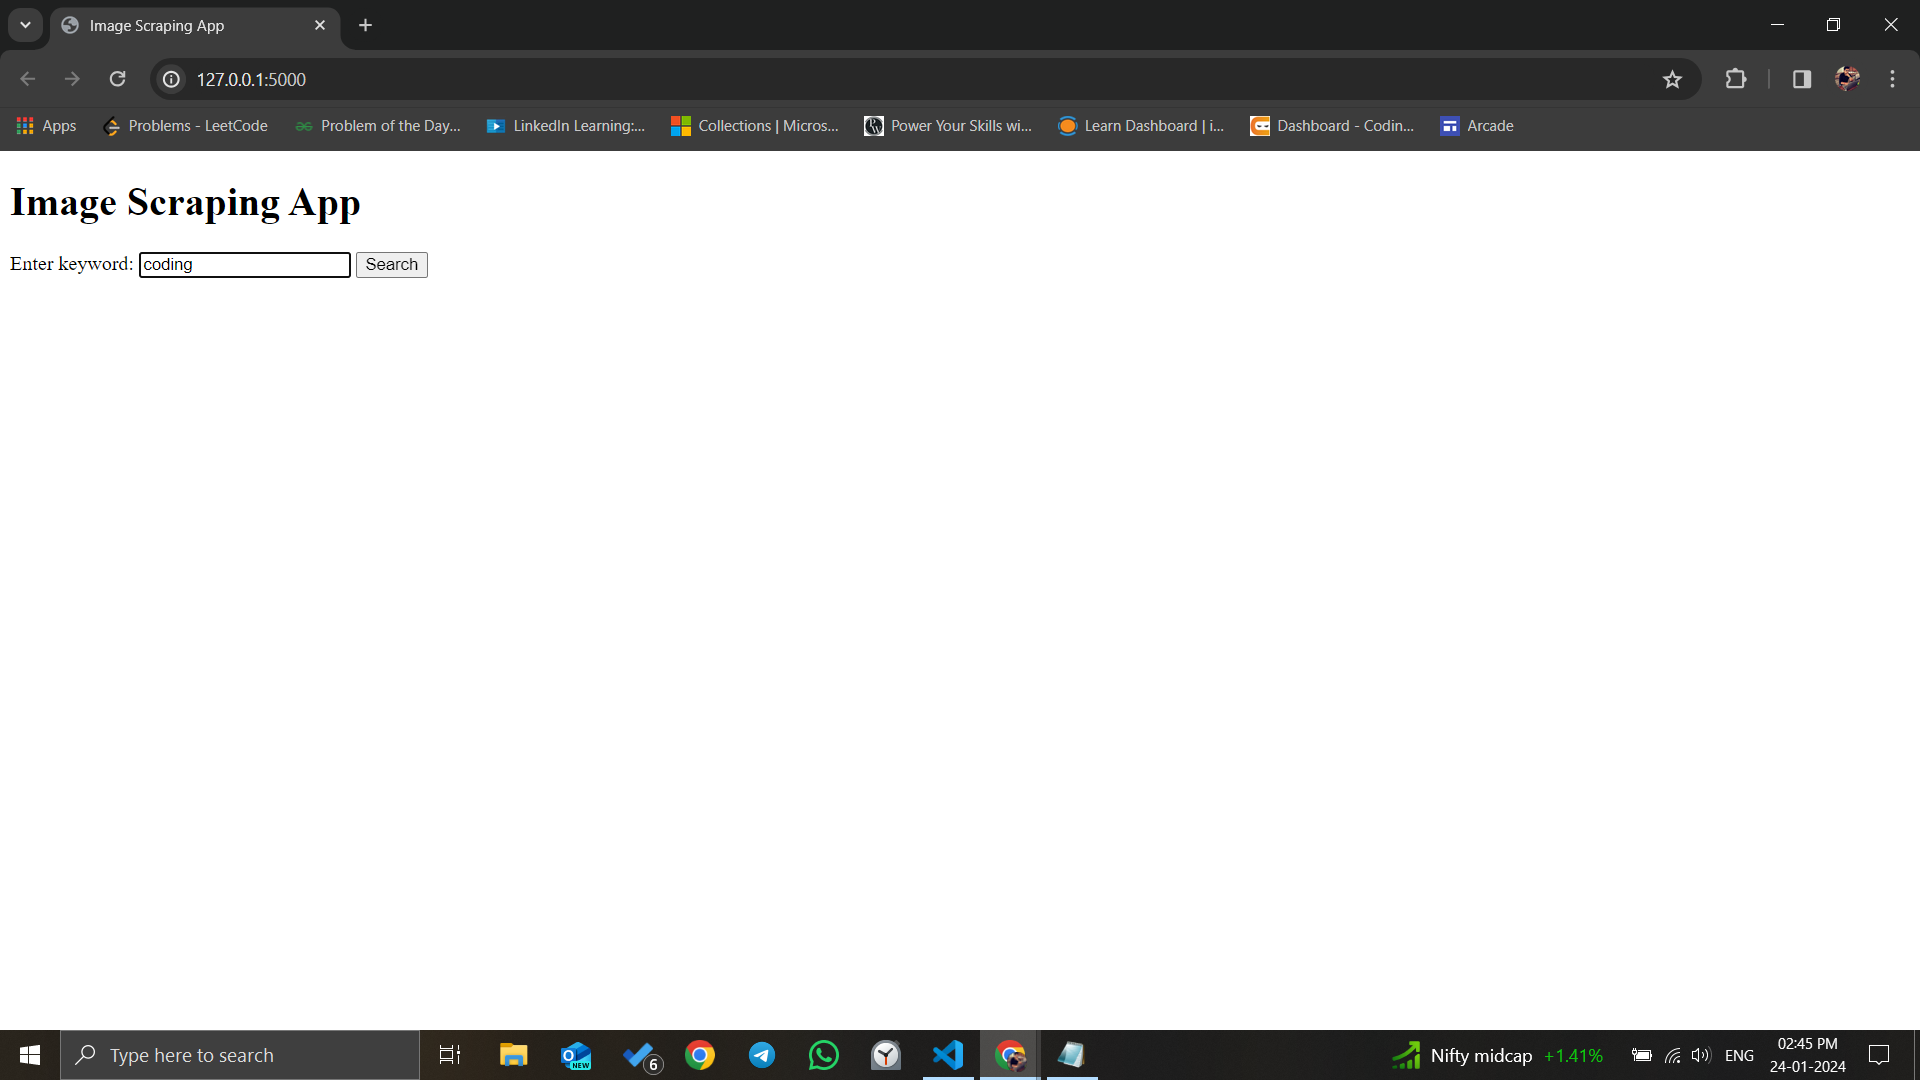

<br>

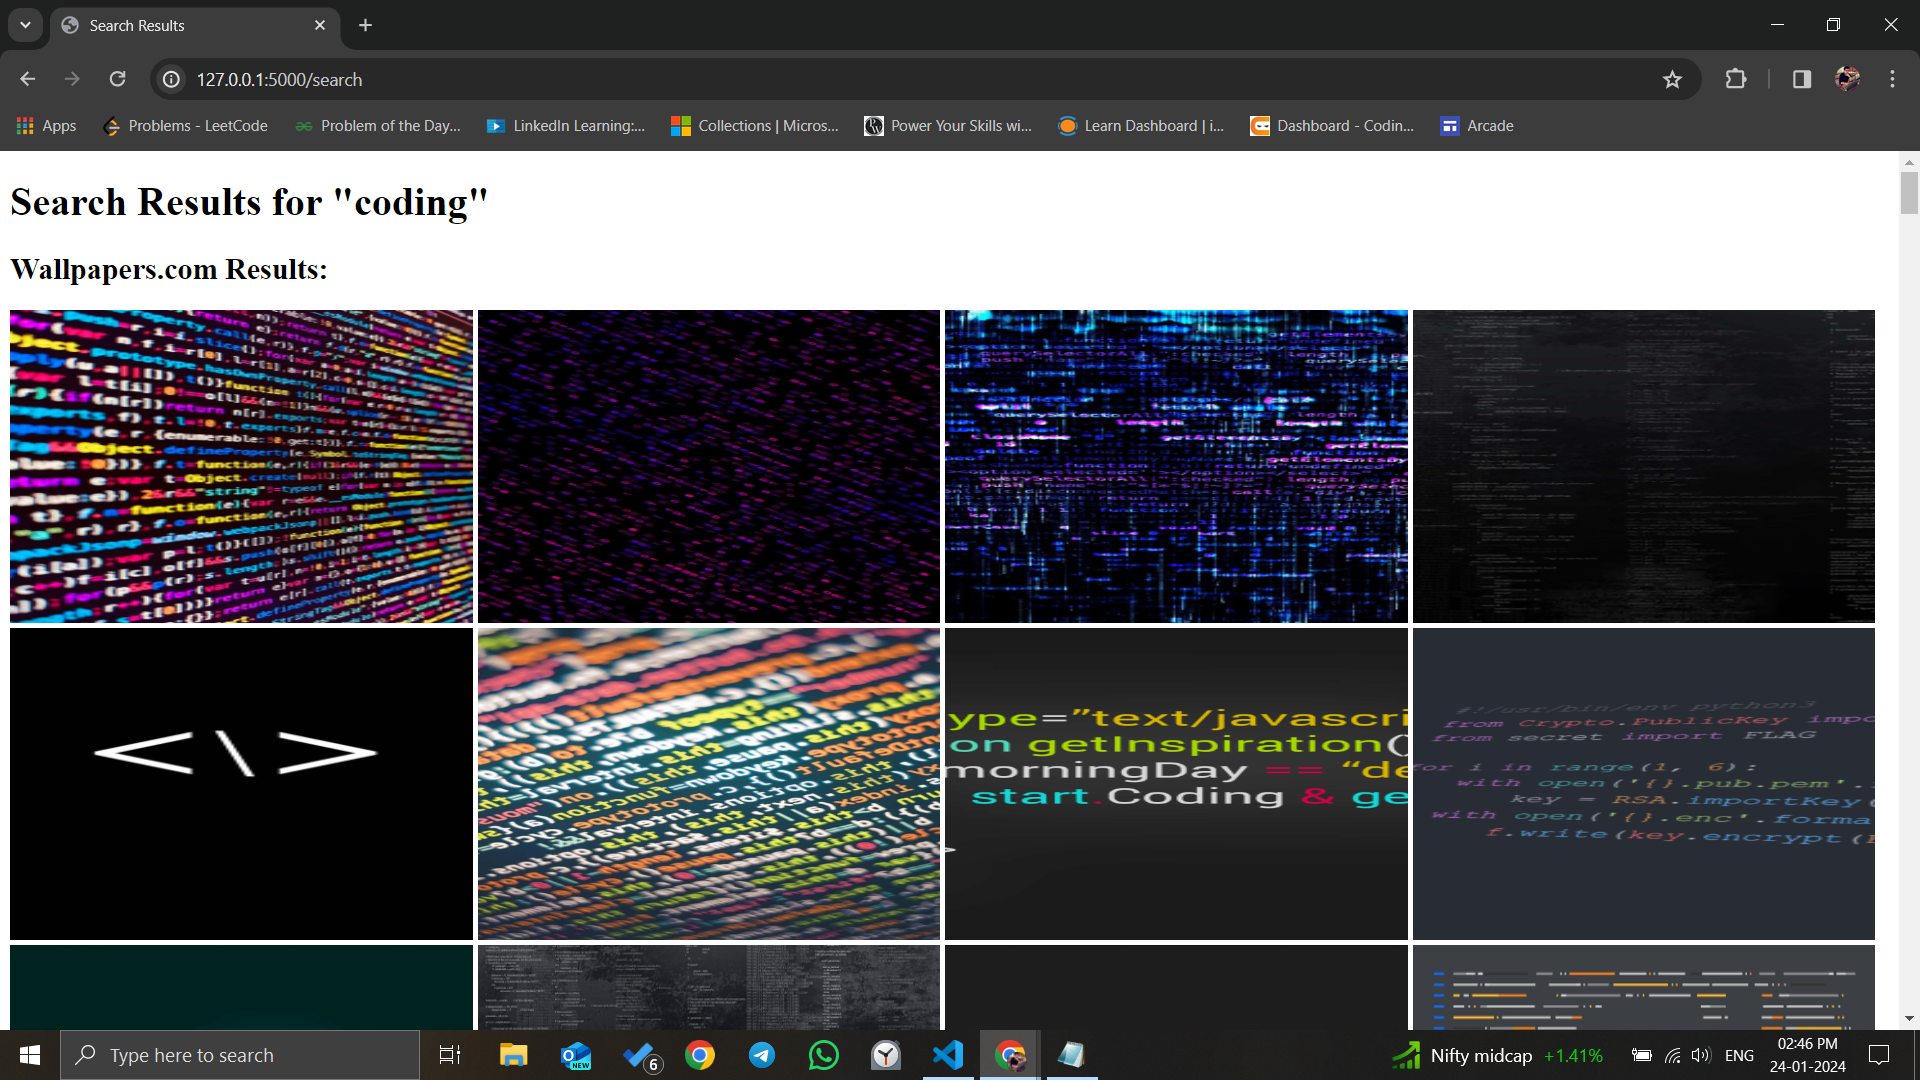

<br>

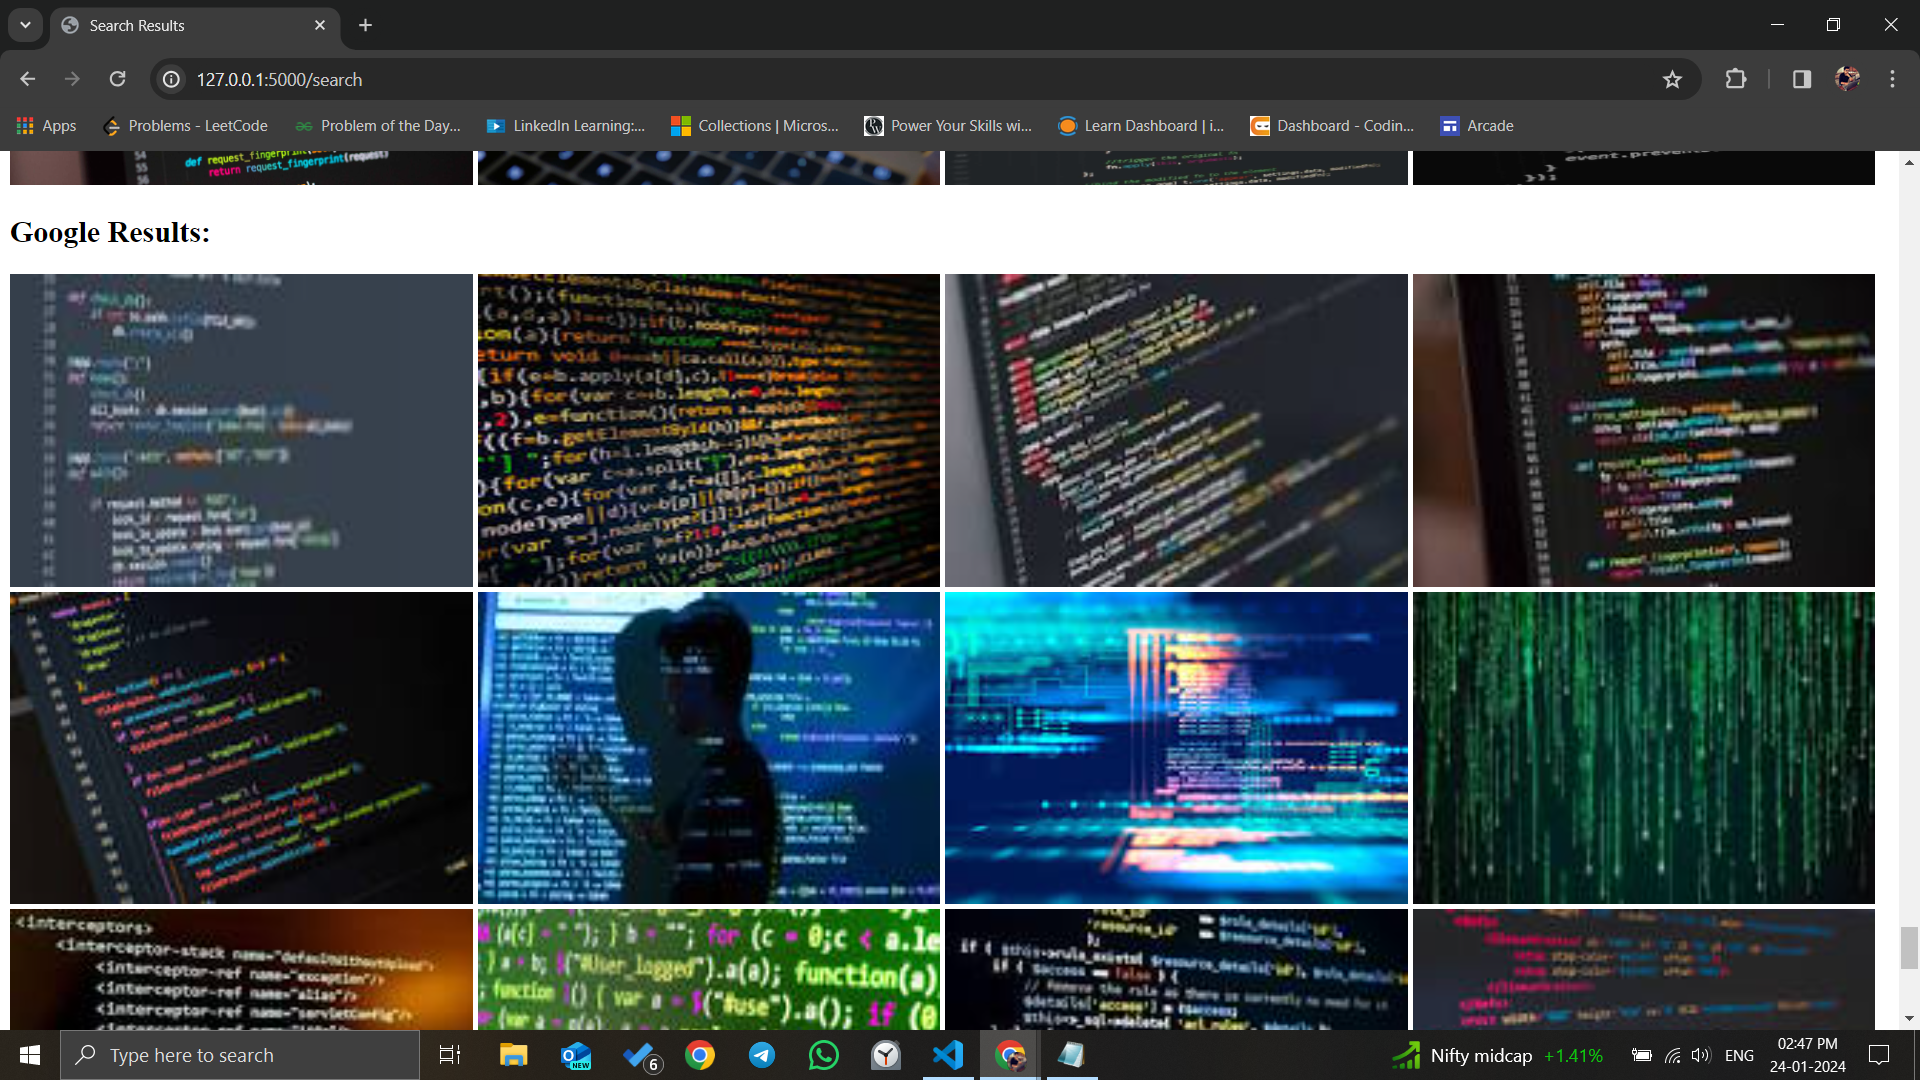

<br>

Deployment link: https://image-scraper-au0k.onrender.com/
</div>

### 2. Create a Flask app that consumes data from external APIs and displays it to users. Try to find an public API which will give you a data and based on that call it and deploy it on cloud platform.

- **app.py**
```python
# Import necessary modules
from flask import Flask, render_template, request
import requests
import random

# Create a Flask object
app = Flask(__name__)


# Function to get data from a public API
def get_publicAPIs_data():
    url = 'https://api.publicapis.org/entries'
    response = requests.get(url)
    data = response.json()
    return data


# Define the route for the main page
@app.route('/')
def load_page():
    # Render the 'index.html' template for the main page
    return render_template('index.html')


# Define the route for the results page, handling both GET and POST requests
@app.route('/results', methods=['POST', 'GET'])
def results():
    # Check if the request method is POST
    if request.method == 'POST':
        # Retrieve the number of APIs specified by the user from the form
        number = int(request.form['number'])

        # Get data from the public API
        data = get_publicAPIs_data()

        # Select a random subset of APIs based on the user-specified number
        select_random = random.sample(data['entries'], number)

        # Render the 'results.html' template with the selected data
        return render_template('results.html', data={'count': len(data['entries']), 'entries': select_random, 'entries_count': len(select_random)})
    else:
        # If the request method is GET, render the 'index.html' template
        return render_template('index.html')



# Run the Flask application
if __name__ == '__main__':
    app.run()
```

<br>

- **index.html**
```html
<!DOCTYPE html>
    <html lang="en">

    <head>
        <title>Query Page</title>
    </head>

    <body style="align-items: center; align-content: center; text-align: center;">
        <h1>How many API do you want?</h1>
        <form action="/results" method="post">
            <input type="number" id="number" name="number"
                style="width: 10cm; margin-top: 30px; height: 30px; font-size: 20px;" min="10" max="500">
            <br><br>
            <button type="submit" style="font-size: 20px;">Submit</button>
        </form>
    </body>

</html>
```

<br>

- **results.html**
```html
<!DOCTYPE html>
<html lang="en">

    <head>
        <title>API Information</title>

        <style>
            li strong {
                font-weight: bold;
            }

            li strong::before {
                content: "\00a0\00a0";
            }

            a:hover {
                text-decoration: underline;
            }

            li:last-child {
                margin-bottom: 0;
            }
        </style>
    </head>

    <body style="text-align: center; font-size: 18px;">
        <h1>API Information - showing {{ data.entries_count }} out of {{ data.count }}</h1>

        <ul style="list-style-type: decimal;">
            {% for api_info in data.entries %}
                <li
                    style="border: 5px; border-color: #ccc; text-align: left; border-radius: 10px; border-style: solid; margin-bottom: 10px; padding: 10px;">
                    <strong>API:</strong> {{ api_info.API }}<br>
                    <strong>Description:</strong> {{ api_info.Description }}<br>
                    <strong>Auth:</strong> {{ api_info.Auth }}<br>
                    <strong>HTTPS:</strong> {{ api_info.HTTPS }}<br>
                    <strong>CORS:</strong> {{ api_info.Cors }}<br>
                    <strong>Link:</strong> <a href="{{ api_info.Link }}" style="color: blue;">{{ api_info.Link }}</a><br>
                    <strong>Category:</strong> {{ api_info.Category }}<br>
                </li>
            {% endfor %}

        </ul>
    </body>

</html>
```

<br>

- **Output**

<div style="width: 800px;">

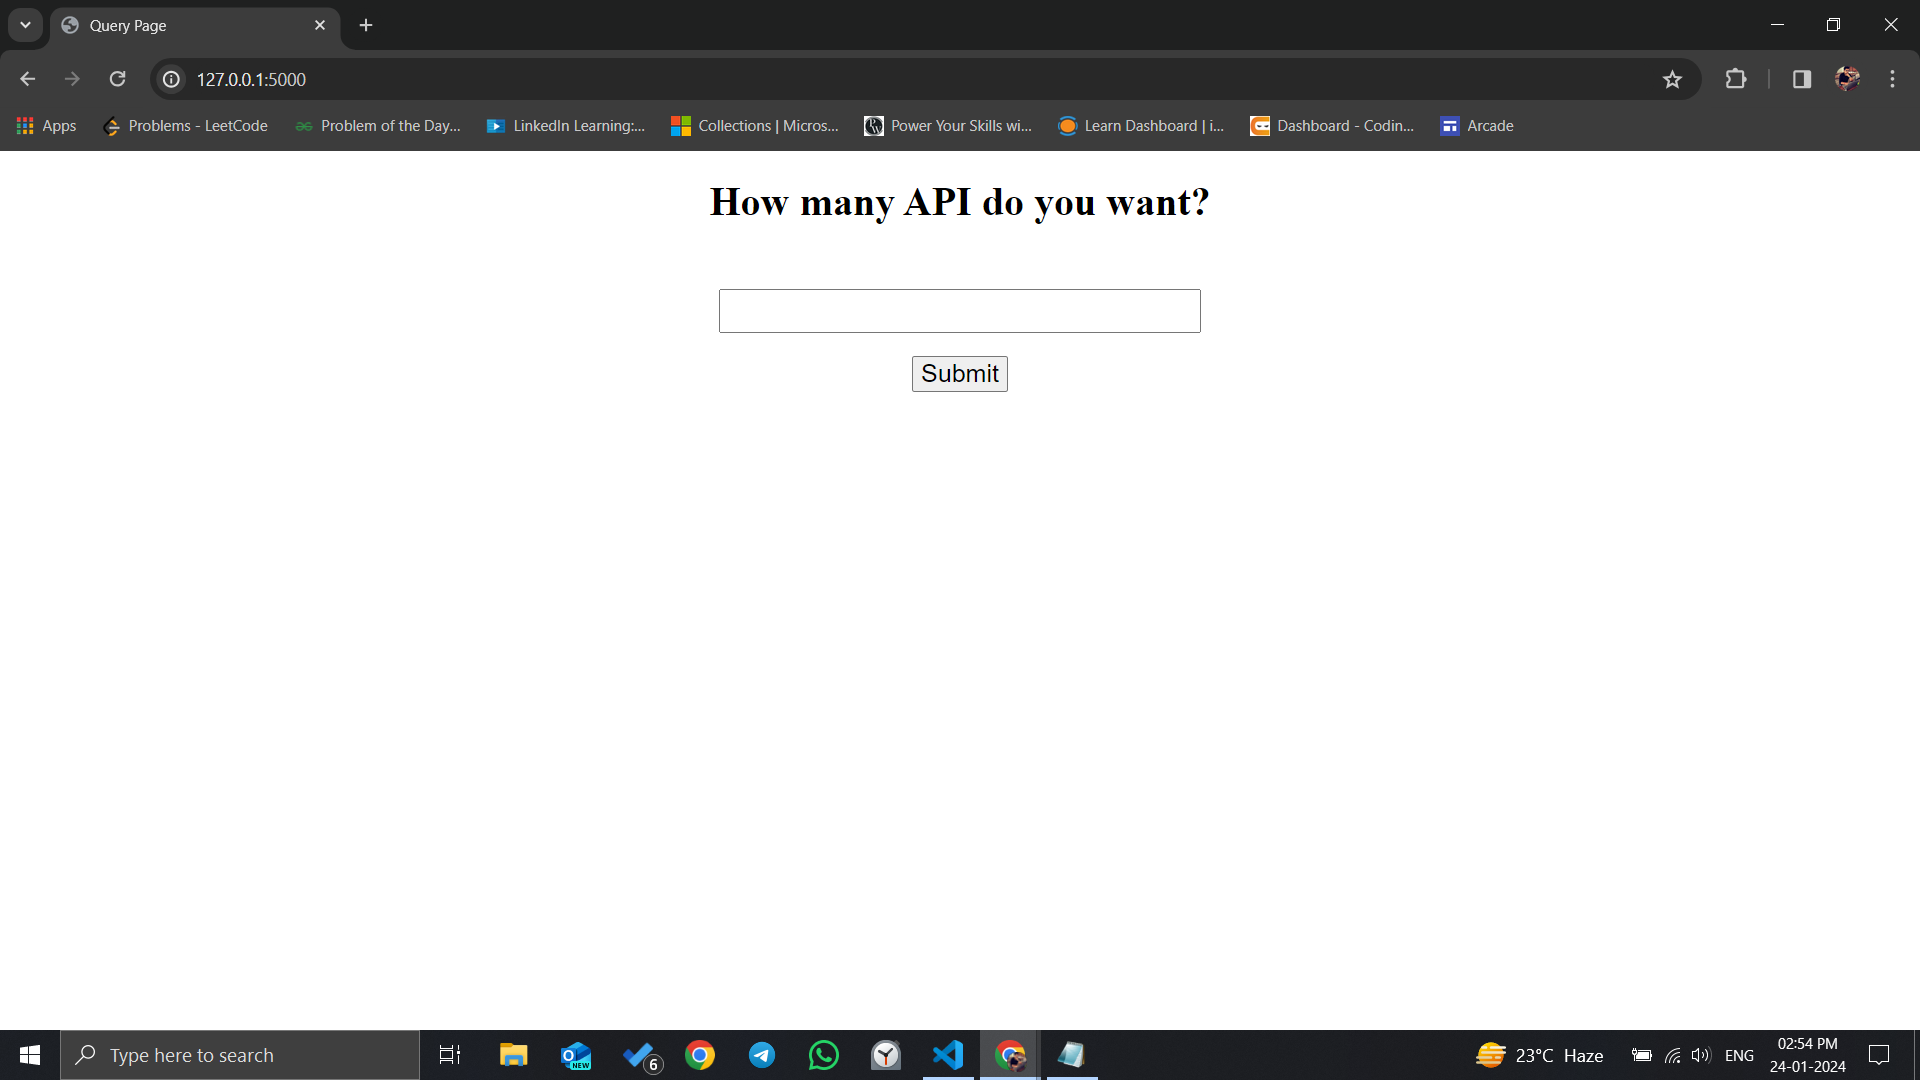

<br>

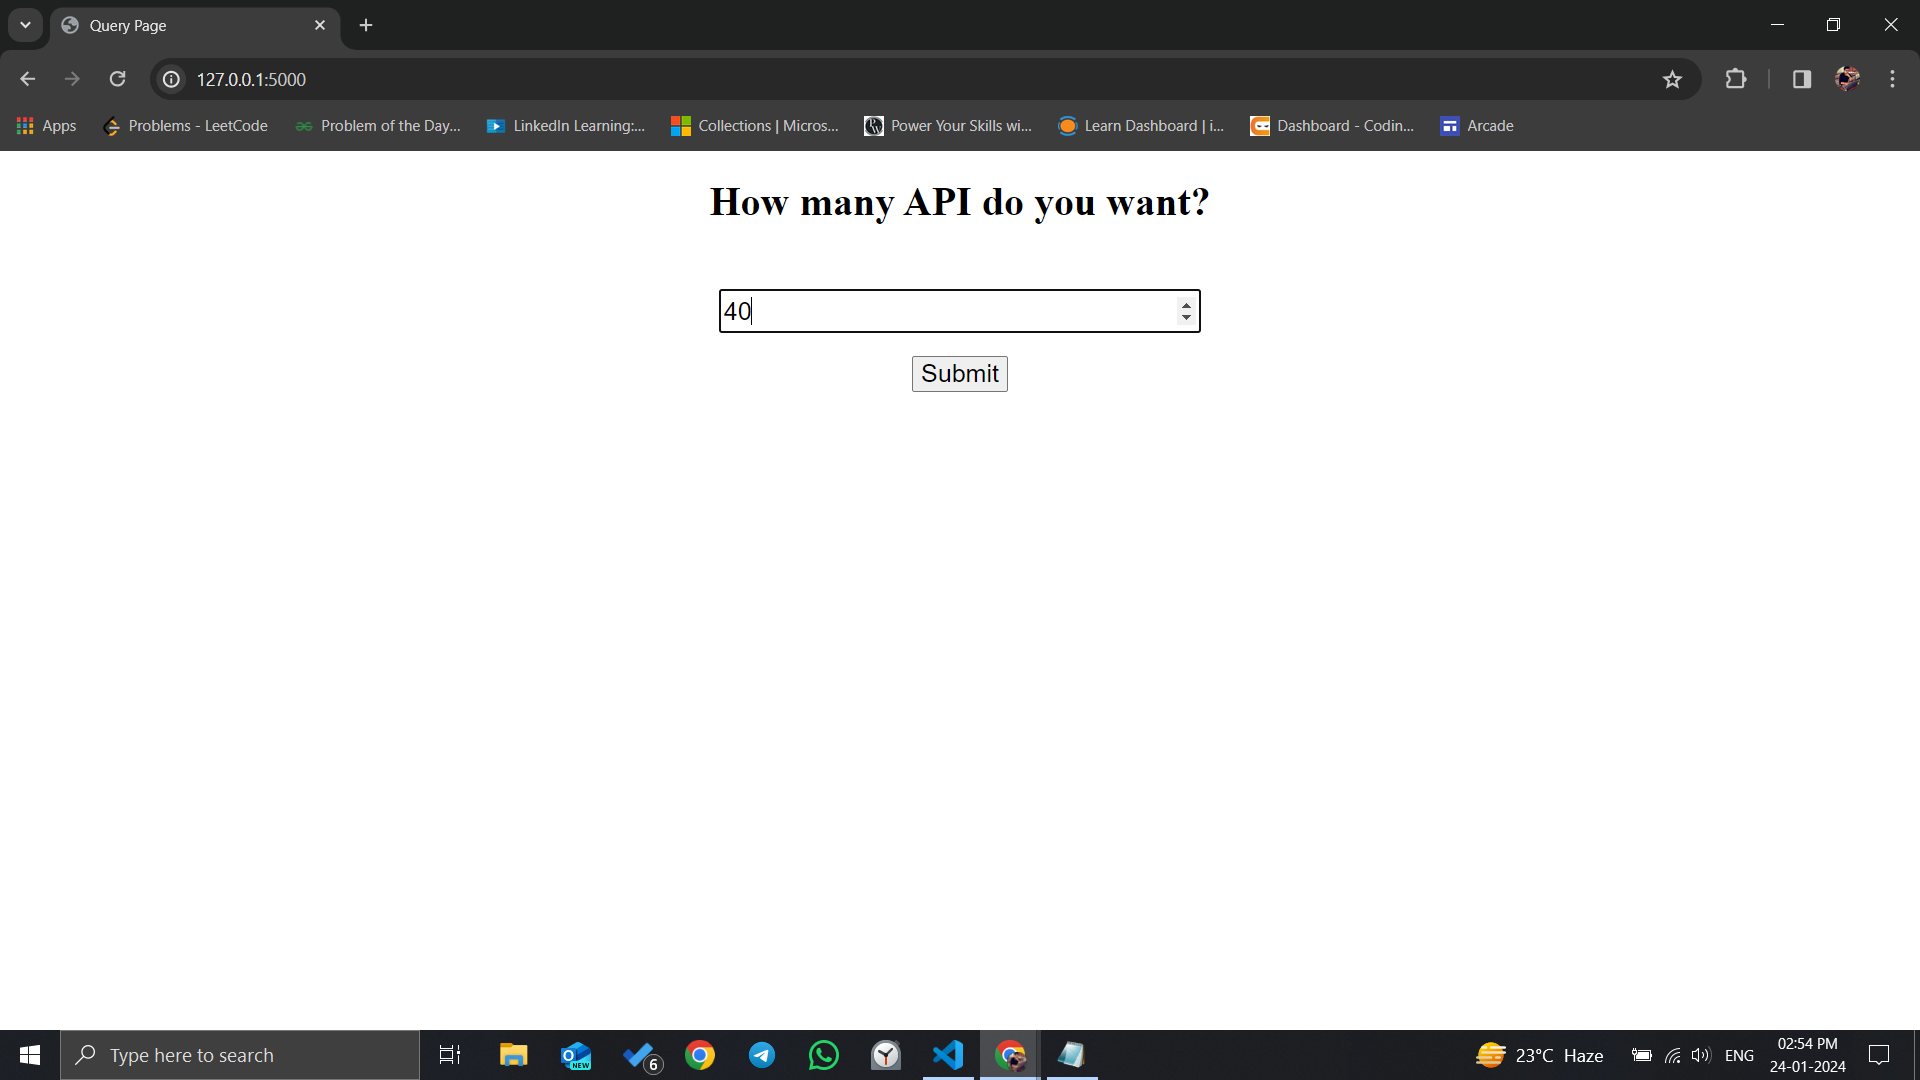

<br>

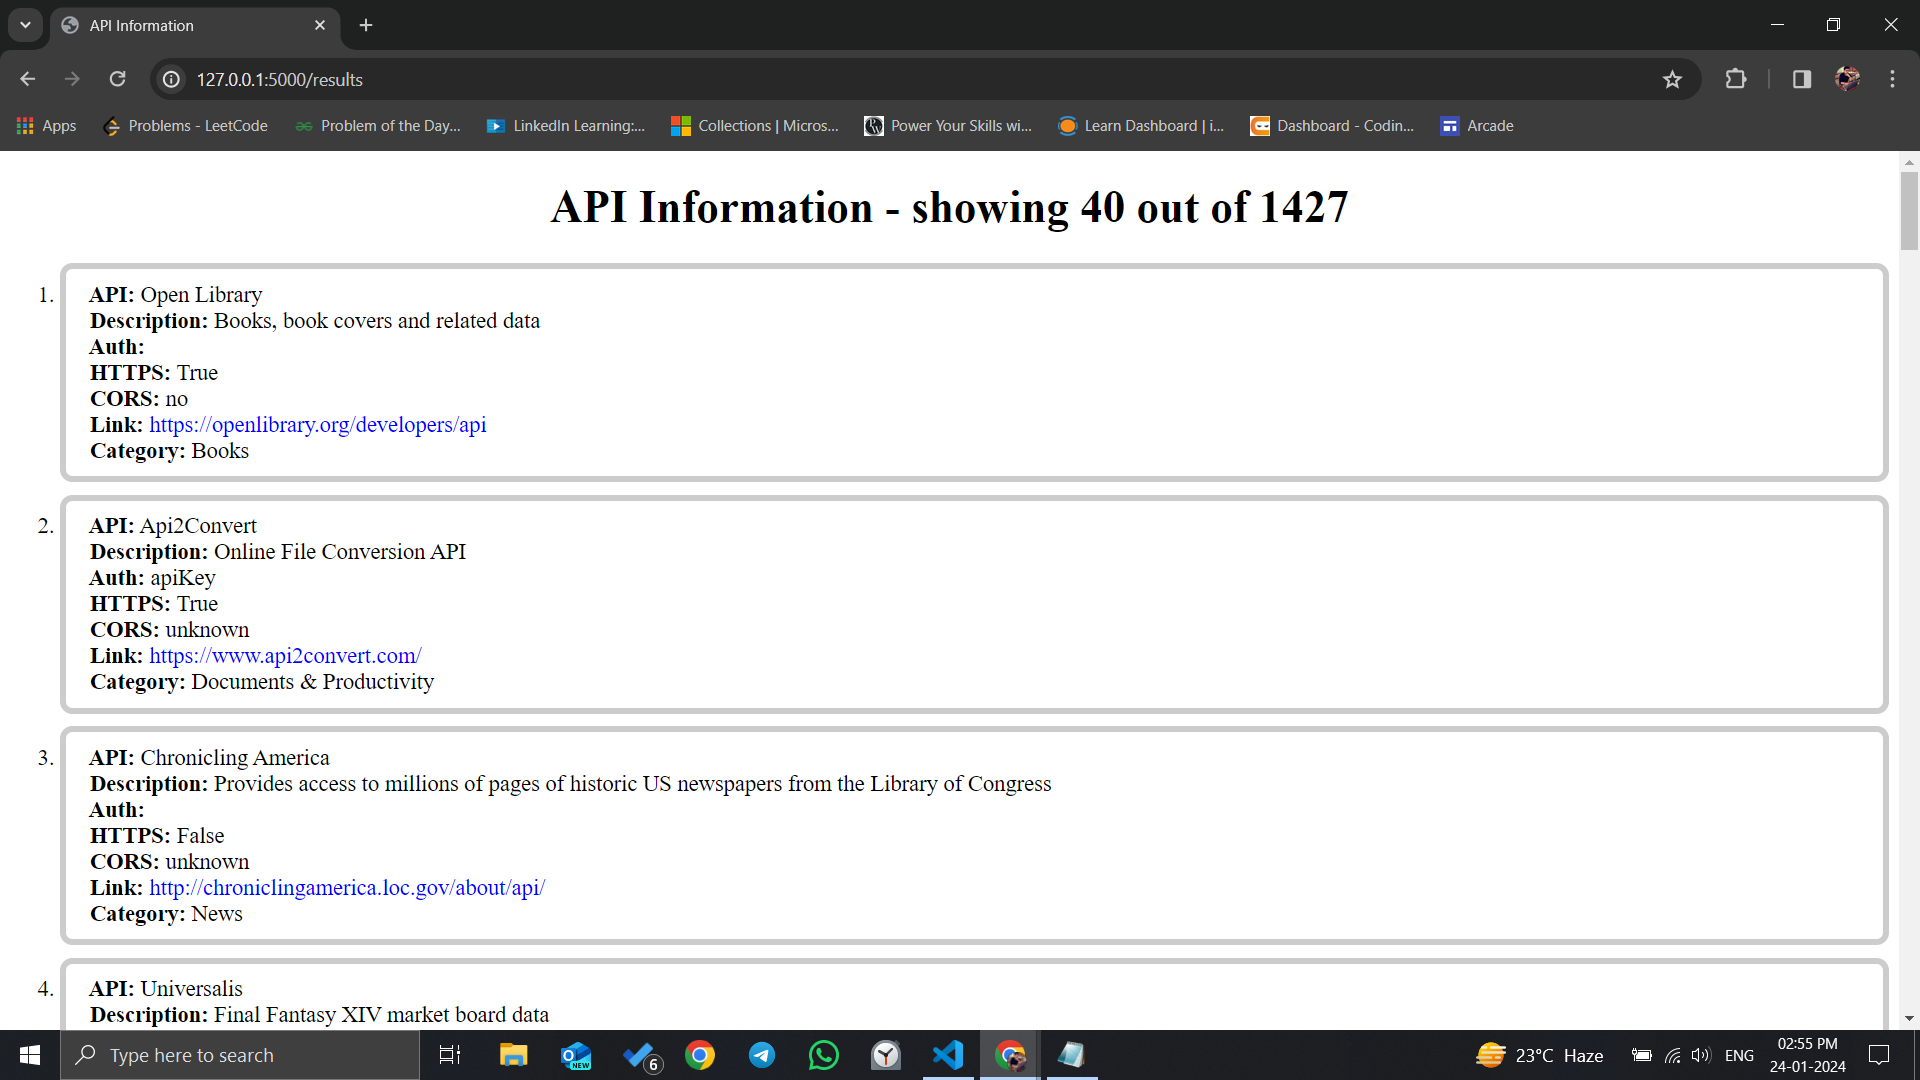

<br>

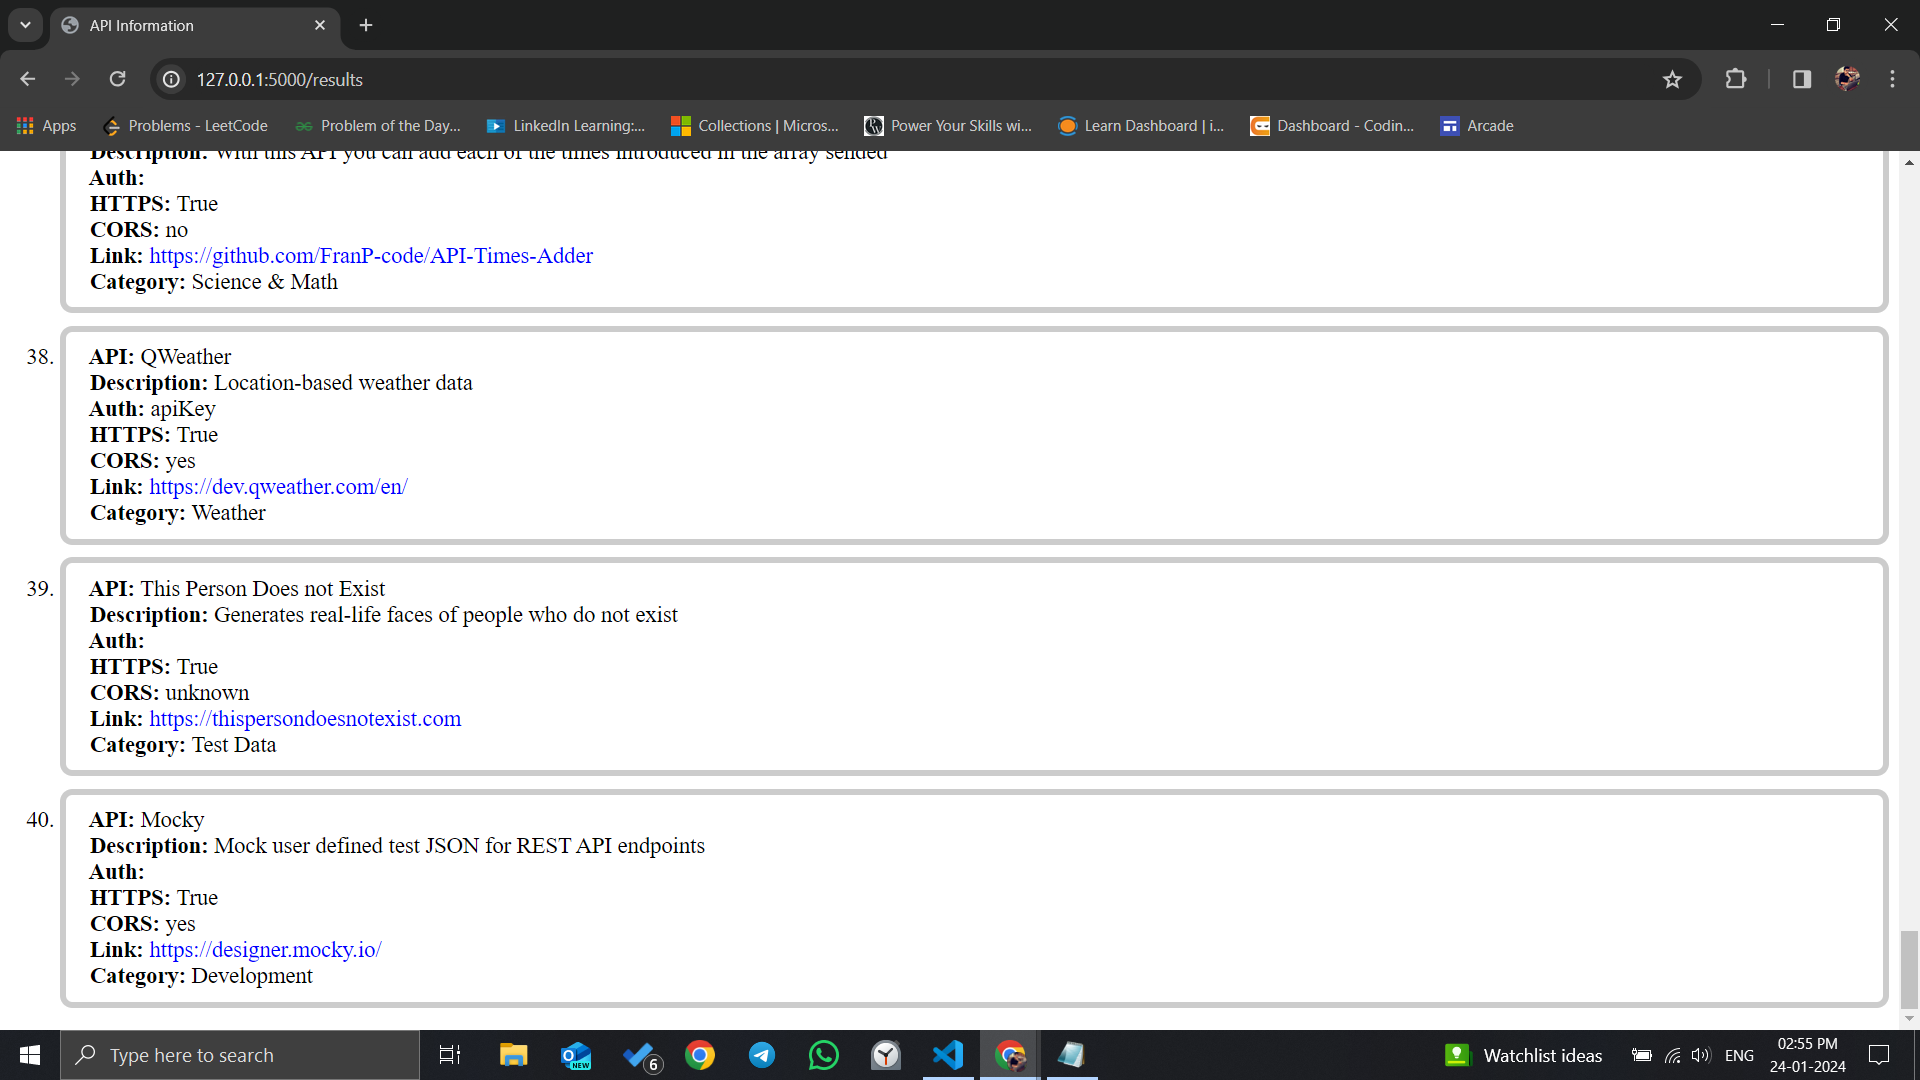

<br>

Deployment link: https://scrapeapi-jrkm.onrender.com/
</div>

### 3. Implement OAuth2 authentication to allow users to log in using their Google or Facebook accounts.

- **app.py**
```python
# Import all necessary modules
from flask import Flask, redirect, url_for, render_template
from flask_dance.contrib.google import make_google_blueprint, google


# Initialize the Flask application
app = Flask(__name__)
# Set a secret key for session management
app.secret_key = 'ABCxyz1234'

# Create a Google Blueprint for authentication
google_set = make_google_blueprint(client_id='395518691726-4q7eu8i12ntgve59t5giaqnouliepge6.apps.googleusercontent.com',
                                   client_secret='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',
                                   redirect_to='google_login',
                                   redirect_url='/google_login/google/authorized')

# Register the Google Blueprint with the Flask application
app.register_blueprint(google_set, url_prefix='/google_login')


# Define the route for initiating the Google login process
@app.route('/google_login')
def google_login():
    # Check if the user is not authorized and redirect to the Google login page
    if not google.authorized:
        return redirect(url_for('google.login'))

    # Retrieve user information from the Google API
    response = google.get('/plus/v1/people/me')
    assert response.ok, response.text

    # Display the user's display name if successfully logged in
    return 'Logged in as: {}'.format(response.json()['displayName'])


# Define the home page route
@app.route('/')
def load_page():
    # Redirect to the Google login page if user is authorized
    if google.authorized:
        return redirect(url_for('google_login'))

    # Render the home page template if user is not authorized
    return render_template('index.html')


# Define the route for handling Google login authorization
@app.route('/google_login/google/authorized')
def google_login_auth():
    # Redirect to the Google login page after successful authorization
    return redirect(url_for('google_login'))



# Run the Flask application
if __name__ == '__main__':
    app.run()
```

<br>

- **indedx.html**
```html
<!DOCTYPE html>
<html lang="en">
    <head>
        <title>Login</title>

        <style>
            body {
                margin: 0;
                padding: 20px;
                text-align: center;
            }

            a:hover {
                text-decoration: underline;
            }

            form {
                margin-top: 20px;
            }

            label {
                font-weight: bold;
            }

            input[type="text"] {
                padding: 8px;
                margin: 5px;
                border: 1px solid #ccc;
                border-radius: 4px;
                width: 250px;
                font-size: 16px;
            }

            input[type="submit"] {
                padding: 10px 20px;
                font-size: 16px;
                background-color: #007bff;
                color: #fff;
                border: none;
                border-radius: 4px;
                cursor: pointer;
            }

            input[type="submit"]:hover {
                background-color: #0056b3;
            }

            ul {
                list-style-type: none;
                padding: 0;
            }

            li {
                background-color: #fff;
                border: 1px solid #ccc;
                border-radius: 5px;
                margin-bottom: 10px;
                padding: 10px;
                text-align: left;
            }
        </style>
    </head>

    <body>
        <h1>Login</h1>

        <a href="/google_login">Login with google</a>
    </body>
</html>
```

<br>

- **Output**

<div style="width: 800px;">

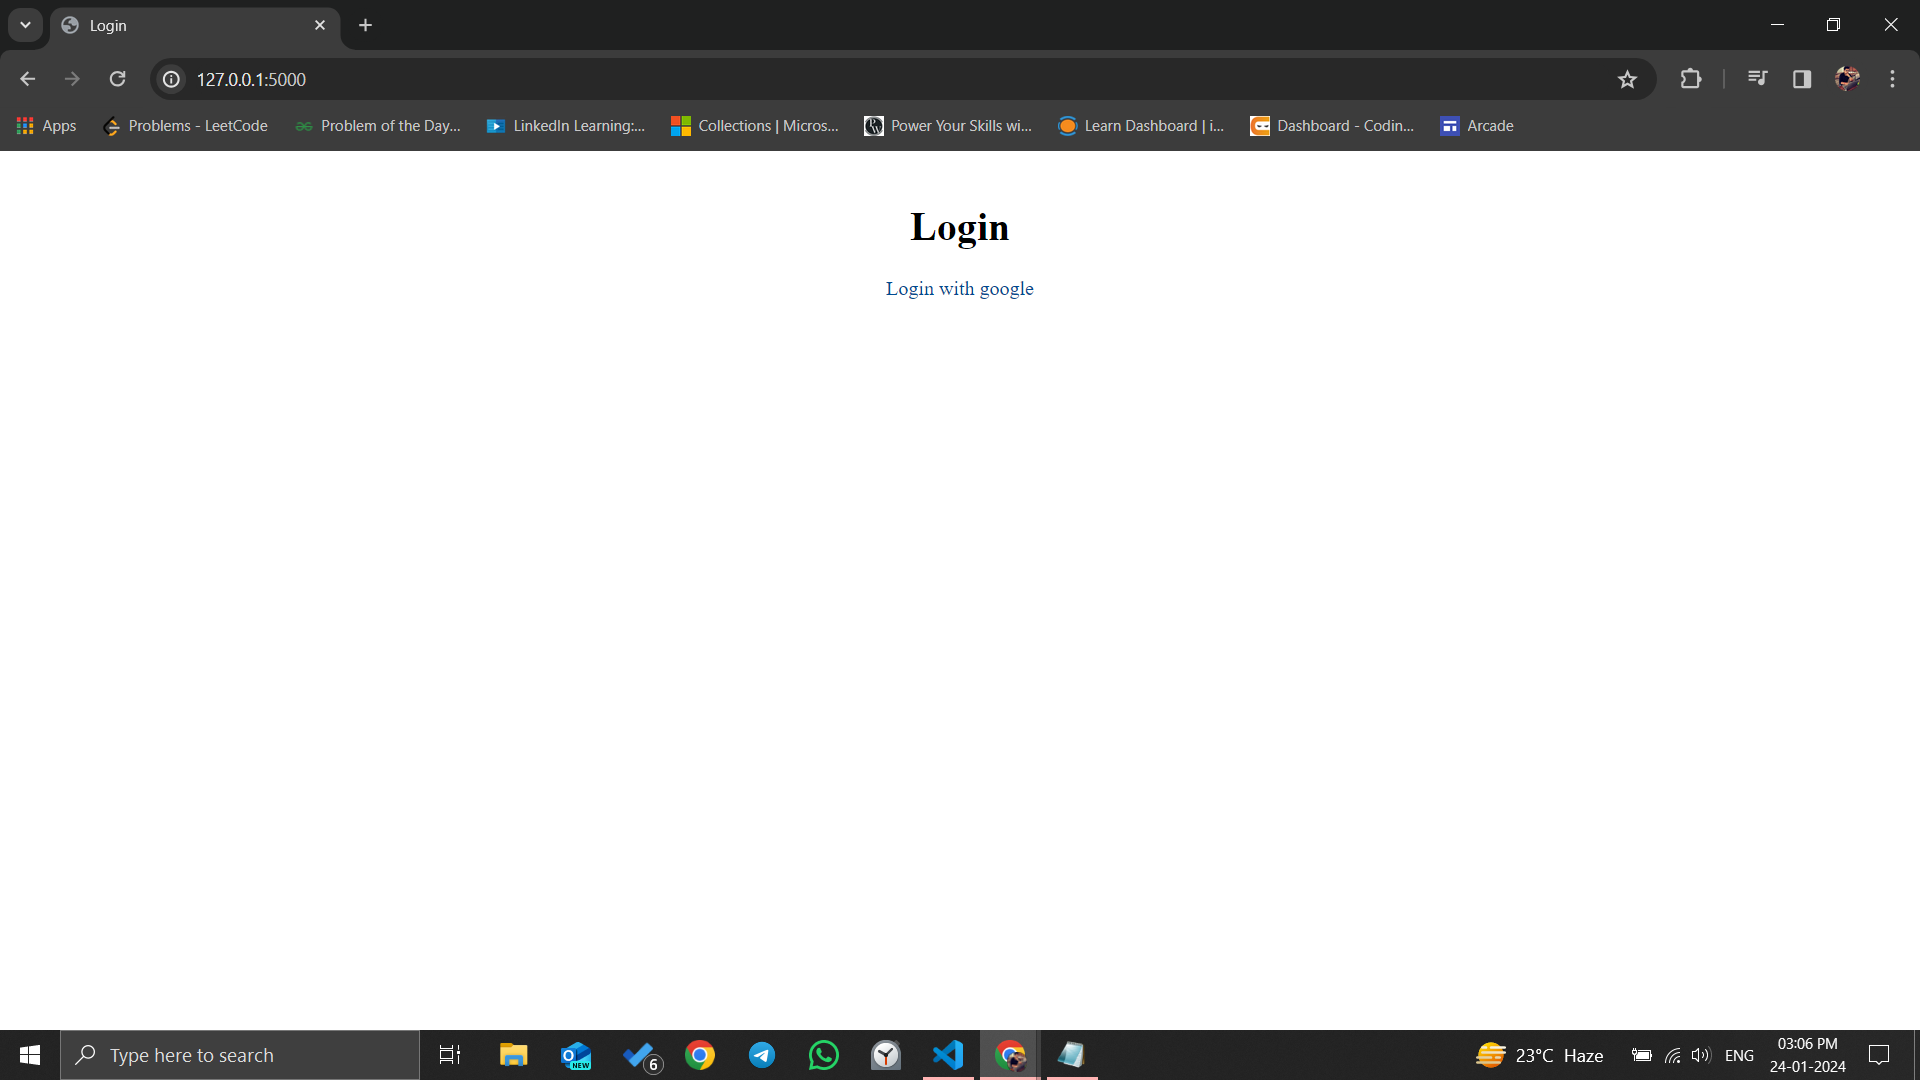

<br>

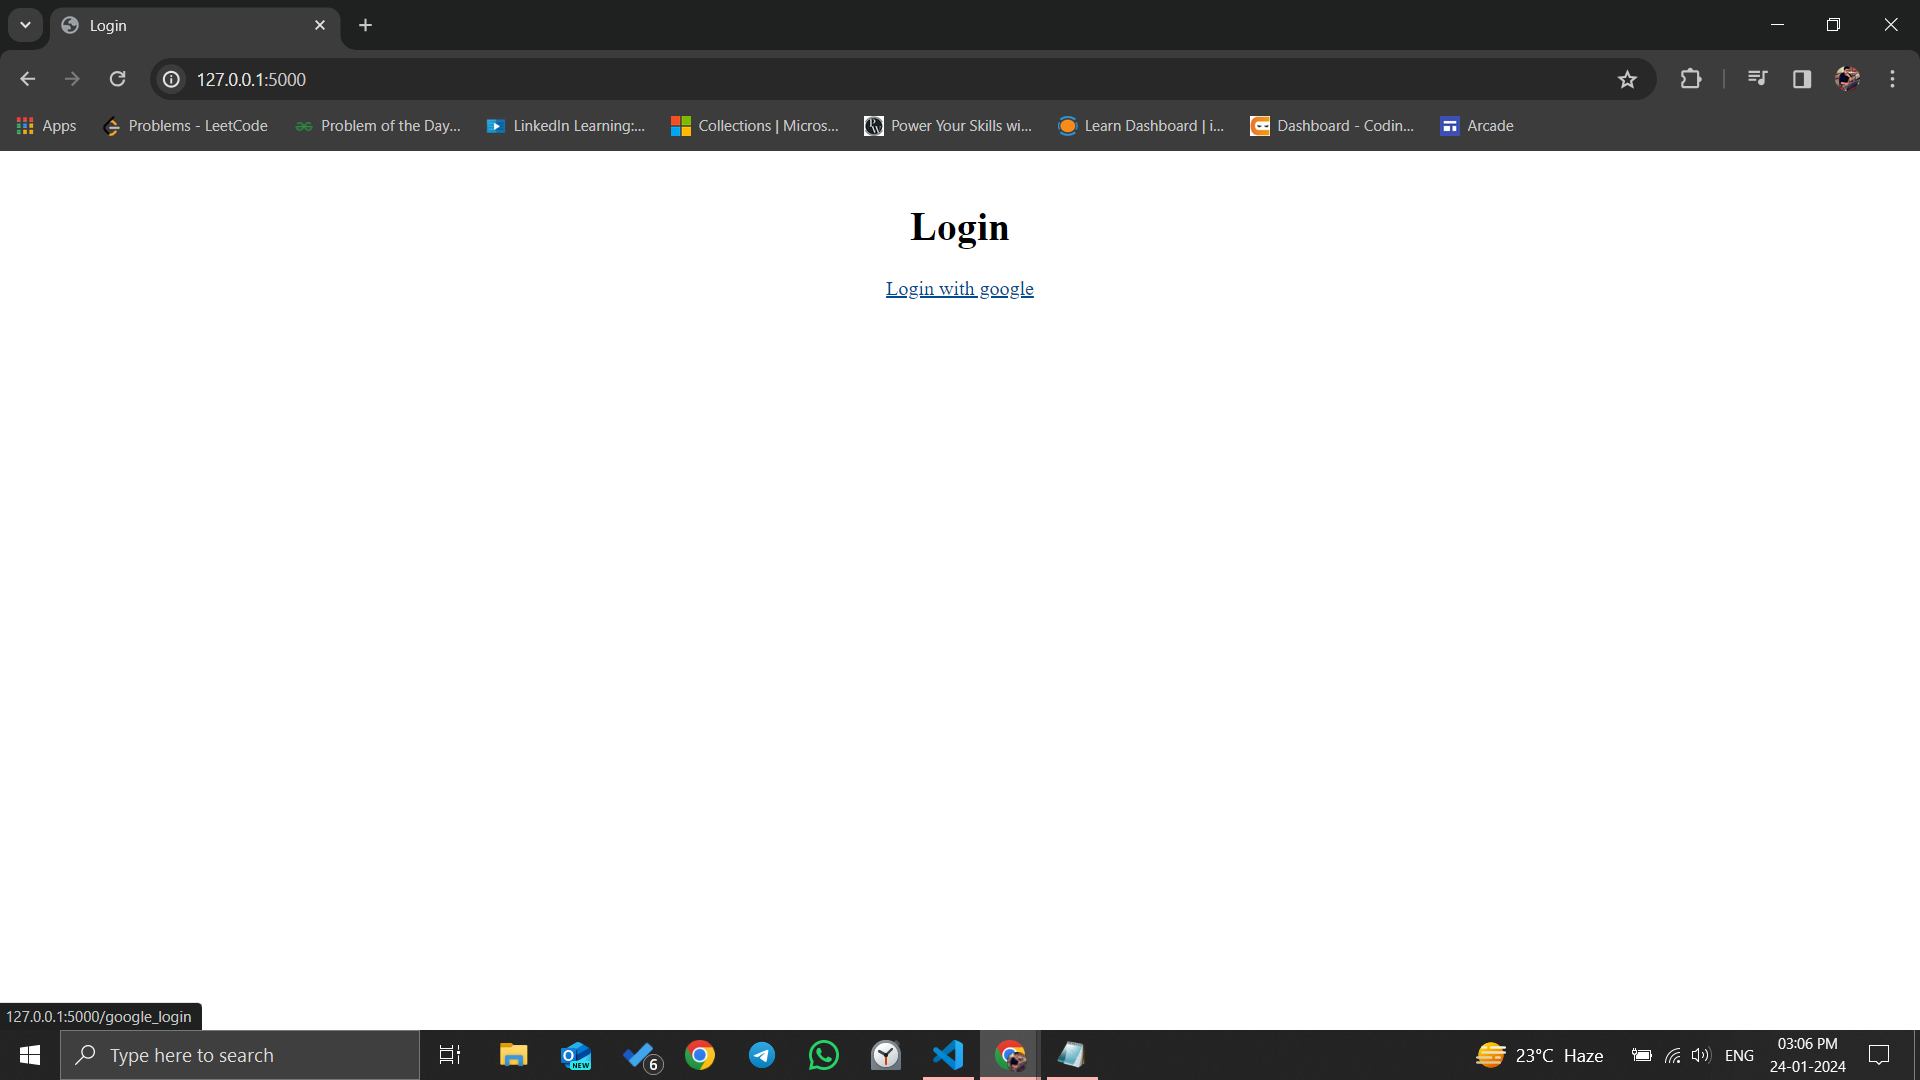

<br>

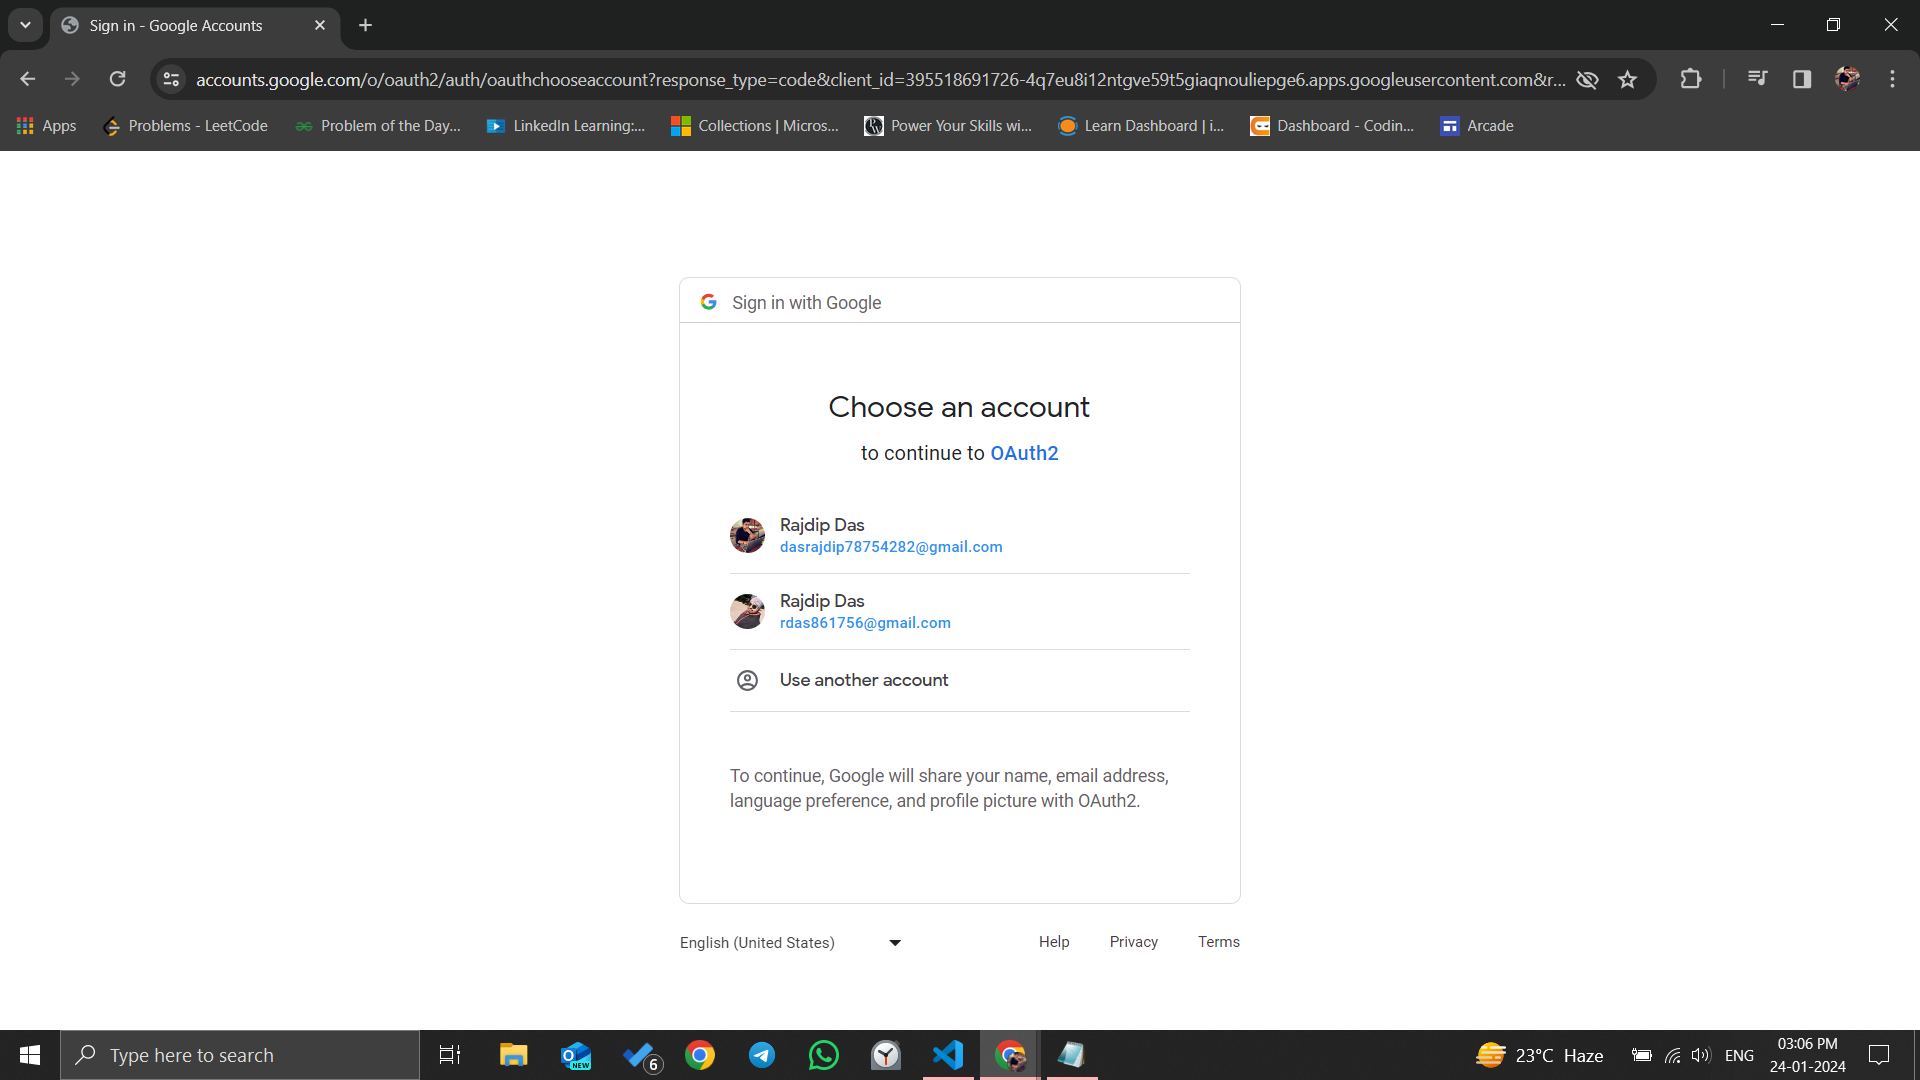

<br>

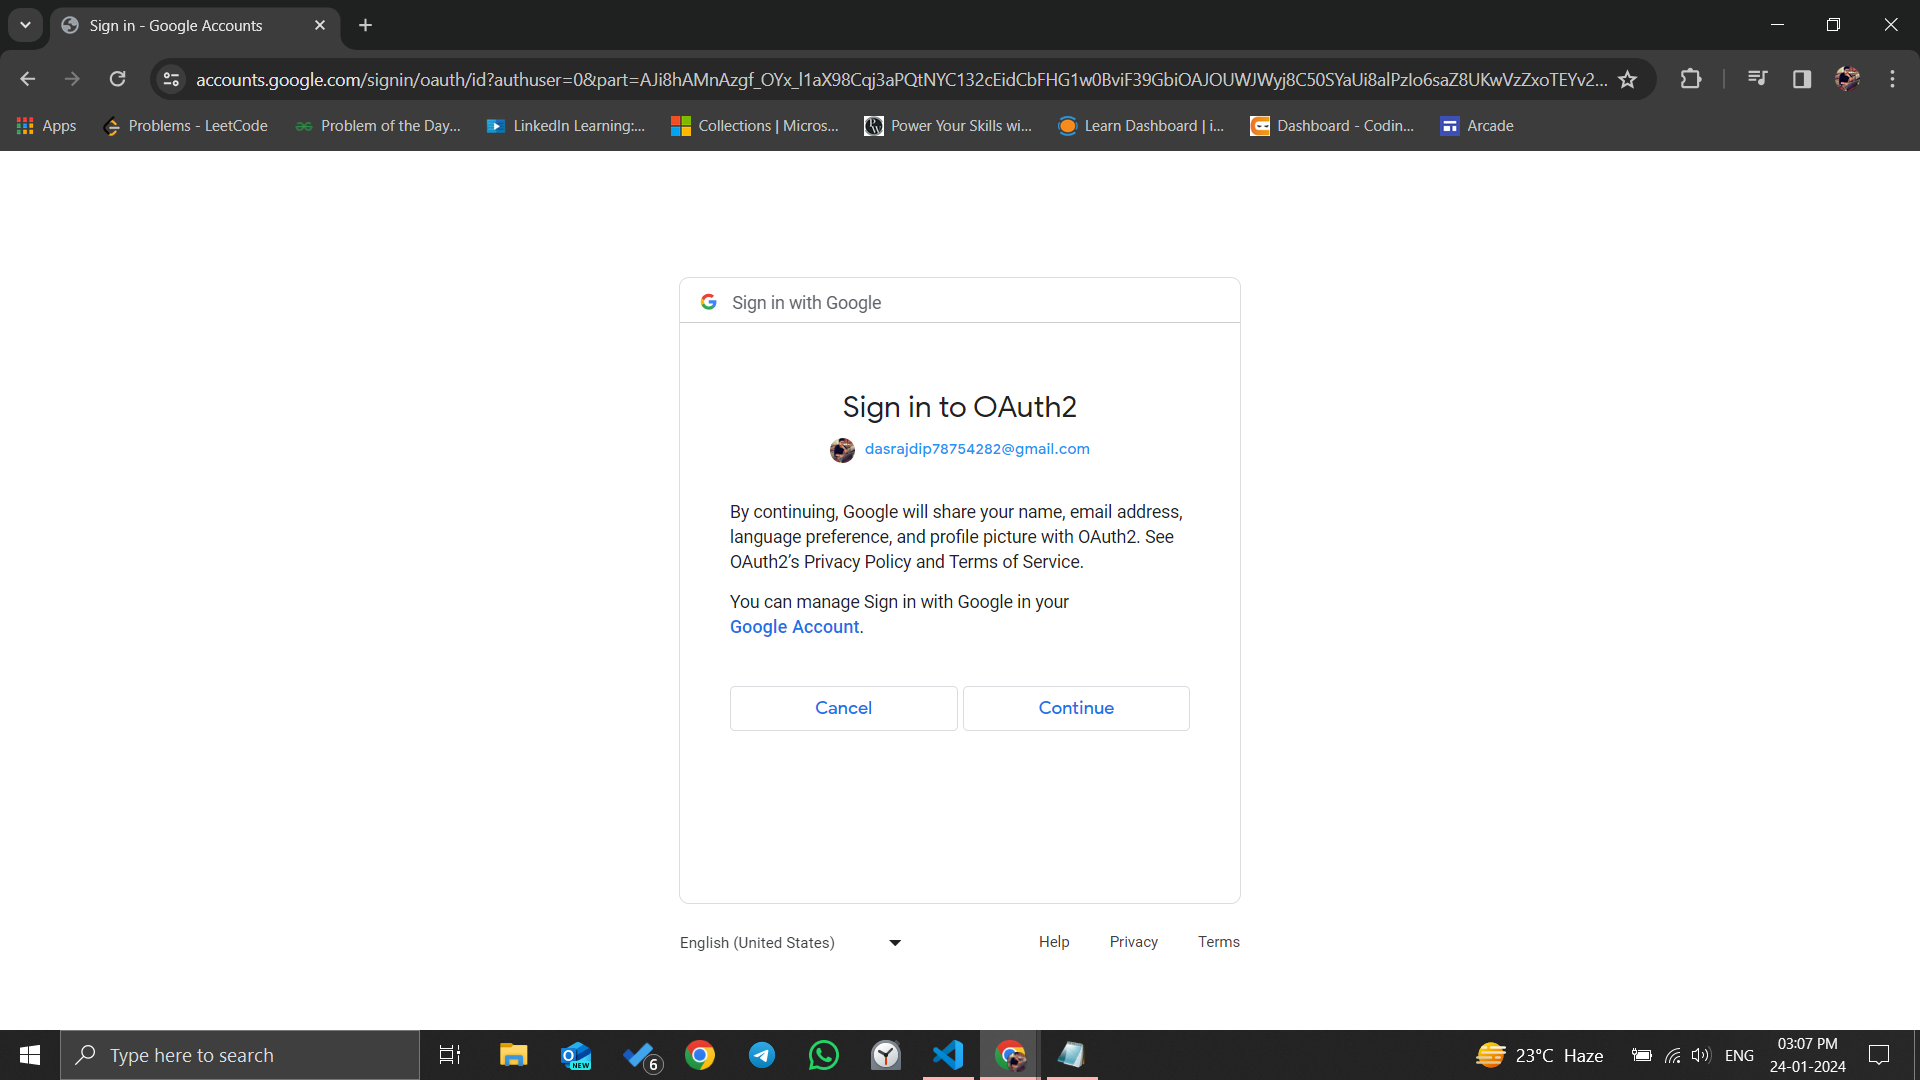

<br>

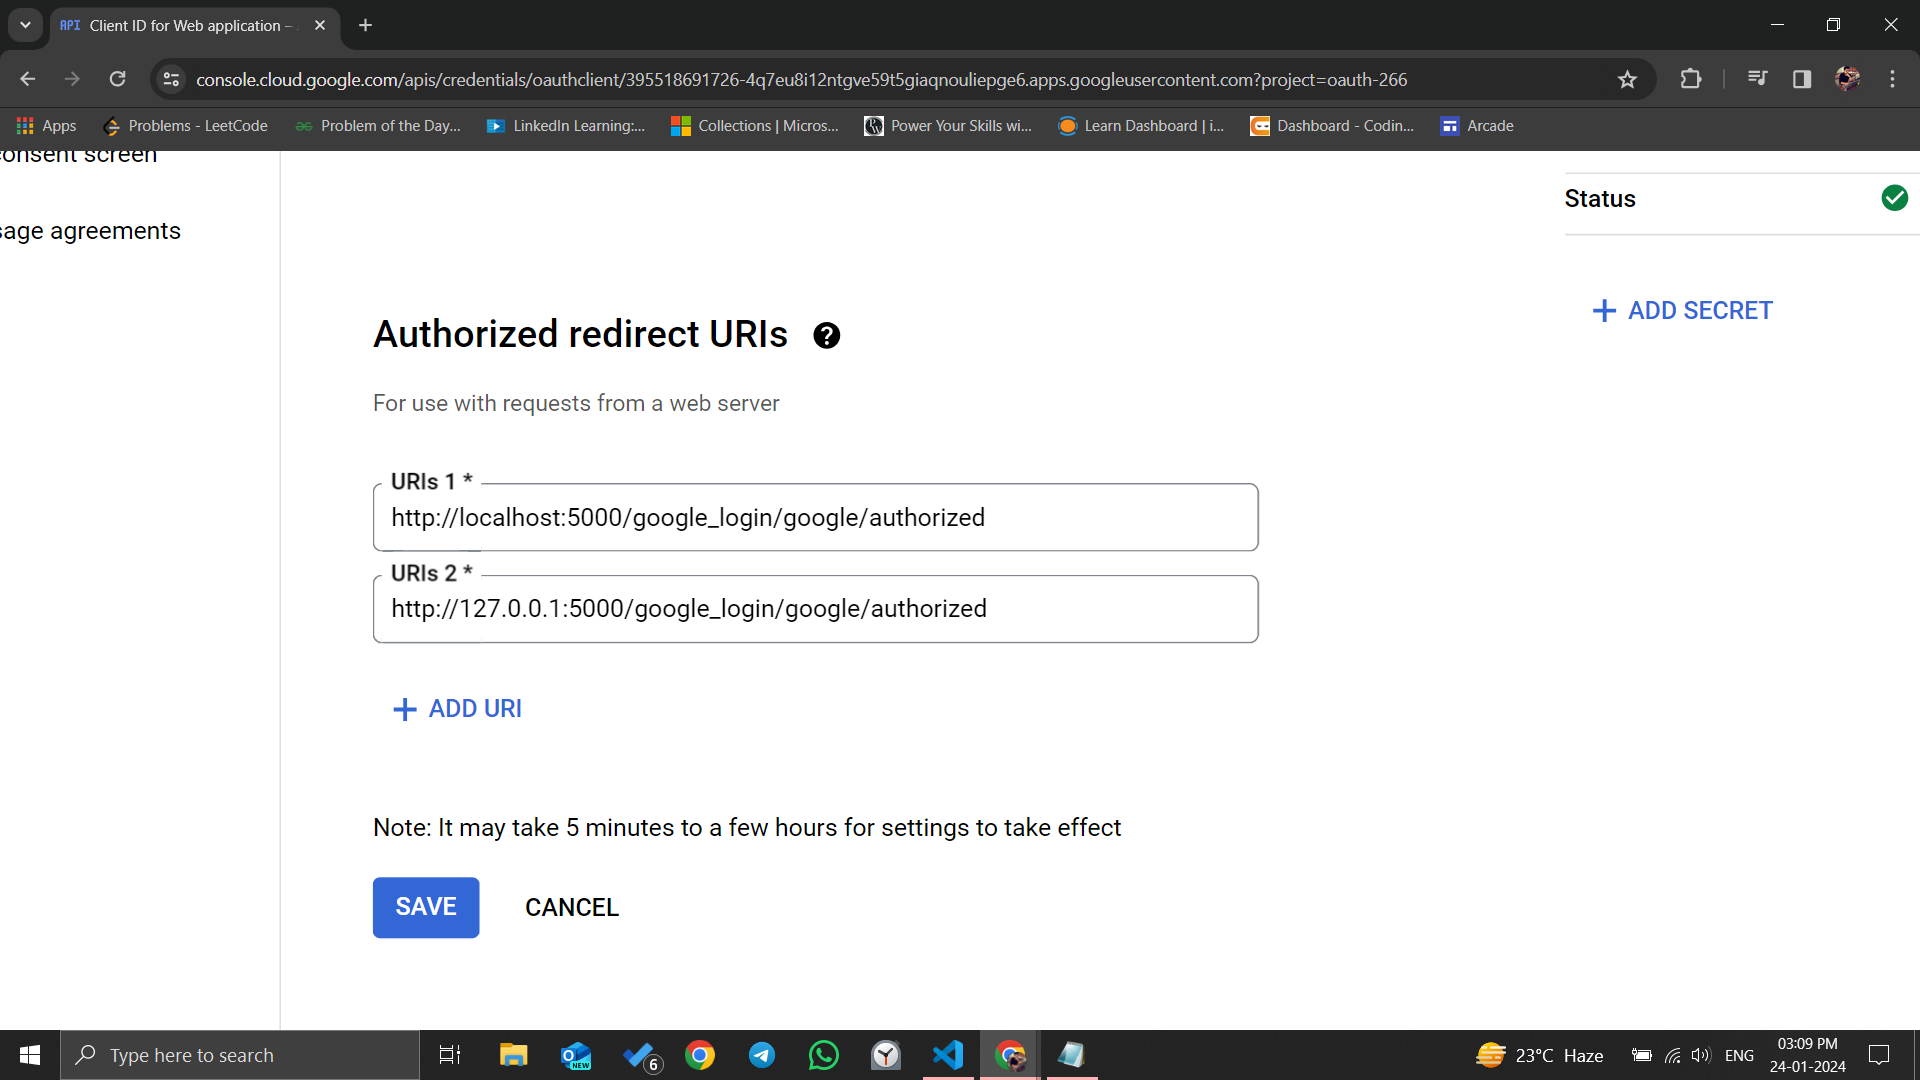
</div>

### 4. Develop a recommendation system using Flask that suggests content to users based on their preferences.

- **app.py**
```python
# Import necessary modules
from flask import Flask, render_template, request
import requests


# Initializing Flask app
app = Flask(__name__)

# The Movie Database (TMDB) API key and base URL
TMDB_API_KEY = 'YOUR_API_KEY'
TMDB_BASE_URL = 'https://api.themoviedb.org/3'


# Function to get top movies based on genre
def get_top_movies(genre_id, number):
    # Endpoint for discovering movies based on genre
    endpoint = f"{TMDB_BASE_URL}/discover/movie"

    # Parameters for the API request
    params = {
        'api_key': TMDB_API_KEY,
        'with_genres': int(genre_id),
        'sort-by': 'vote_average.desc',     # Sorting by vote average in descending order
        'vote_count.gte': 500               # Considering movies with vote count greater than or equal to 500
    }

    # Making a GET request to TMDB API
    response = requests.get(endpoint, params=params)

    # Checking if the request was successful (status code 200)
    if response.status_code == 200:
        movies = []
        # Extracting movie results from the response from pages 1 to 3
        for page in range(1, 4):
            params['page'] = page       # Add the 'page' parameter to the request

            response = requests.get(endpoint, params=params)

            # Check if the request for the current page was successful
            if response.status_code == 200:
                # Extend the movies list with results from the current page
                movies.extend(response.json().get('results', []))
            else:
                # If the request for the current page was not successful, break the loop
                break

        # Extracting title of top movies according to user input
        top_movies = [movie['title'] for movie in movies[:number]]
        return top_movies
    else:
        # Return an empty list if the request was not successful
        return []


# Route for the home page
@app.route('/')
def load_page():
    return render_template('index.html')


# Route for recommending movies based on selected genre
@app.route('/recommend', methods=['GET', 'POST'])
def recommend():
    if request.method == 'POST':
        # Getting the selected genre from the form data
        genre = request.form['genre']
        # Splitting the genre into ID and name
        genre_id, genre_name = genre.split(':')

        # Getting the number of top movies from the form data
        number = int(request.form['number'])

        # Calling the function to get top movies based on the selected genre and specified number
        top_movies = get_top_movies(genre_id, number)
        # Rendering the recommendations page with the category (genre), recommended movies the count number
        return render_template('recommendations.html', category=genre_name, recommendations=top_movies, count=number)
    
    else:
        # If the request method is not POST, render the home page
        return render_template('index.html')



# Running the Flask application
if __name__ == '__main__':
    app.run()
```

<br>

- **index.html**
```html
<!DOCTYPE html>
<html lang="en">
    <head>
        <title>Movie Recommendation System</title>

        <style>
            body {
                text-align: center;
                padding: 20px;
            }

            form {
                margin-top: 80px;
            }

            label {
                font-weight: bold;
                font-size: x-large;
                color: rgb(43, 5, 235);
            }

            select {
                padding: 8px;
                margin: 5px;
                border: 1px solid #95a1c3;
                border-width: 3px;
                border-radius: 10px;
                width: 250px;
                font-size: 20px;
            }

            input[type="number"] {
                padding: 8px;
                margin: 5px;
                border: 1px solid #95a1c3;
                border-width: 3px;
                border-radius: 10px;
                width: 250px;
                font-size: 20px;
            }

            input[type="submit"] {
                padding: 10px 20px;
                font-size: 16px;
                background-color: #007bff;
                color: #fff;
                border-radius: 10px;
                cursor: pointer;
            }

            input[type="submit"]:hover {
                background-color: #0056b3;
            }

        </style>
    </head>

    <body>
        <h1>Welcome to the Movie Recommendation System</h1>
        <h3>We pick top movies for you</h3>

        <form action="/recommend" method="post">
            <label for="category">Pick your preferred movie Genre:</label>
            <br>
            
            <select name="genre" id="genre" required>
                <option value="28:Action">Action</option>
                <option value="12:Adventure">Adventure</option>
                <option value="16:Animation">Animation</option>
                <option value="35:Comedy">Comedy</option>
                <option value="80:Crime">Crime</option>
                <option value="99:Documentary">Documentary</option>
                <option value="18:Drama">Drama</option>
                <option value="10751:Family">Family</option>
                <option value="14:Fantasy">Fantasy</option>
                <option value="36:History">History</option>
                <option value="27:Horror">Horror</option>
                <option value="10402:Music">Music</option>
                <option value="9648:Mystery">Mystery</option>
                <option value="10749:Romance">Romance</option>
                <option value="878:Science Fiction">Science Fiction</option>
                <option value="10770:TV Movie">TV Movie</option>
                <option value="53:Thriller">Thriller</option>
                <option value="10752:War">War</option>
                <option value="37:Western">Western</option>
            </select>
            <br><br>
            
            <label for="count">How many recommendation you want?</label><br>
            <input type="number" id="number" name="number" min="10" max="50" placeholder="Enter Movie Count" required>
            <br><br>
            
            <input type="submit" value="Get Results">
        </form>
    </body>
</html>
```

<br>

- **recommendations.html**
```html
<!DOCTYPE html>
<html lang="en">
    <head>
        <title>Movie Recommendations</title>
        
        <style>
            body {
                text-align: center;
                font-size: 18px;
                padding: 20px;
            }

            ul {
                list-style-type: decimal;
            }

            li {
                border: 5px solid #ccc;
                border-radius: 10px;
                margin-bottom: 10px;
                padding: 10px;
                text-align: left;
            }

        </style>
    </head>

    <body>
        <h1>Recommended {{ count }} Movies for {{ category }}</h1>
        <ul>
            {% for movie in recommendations %}
                <li>{{ movie }}</li>
            {% endfor %}
        </ul>
    </body>
</html>
```

<br>

- **Output**

<div style="width: 800px;">

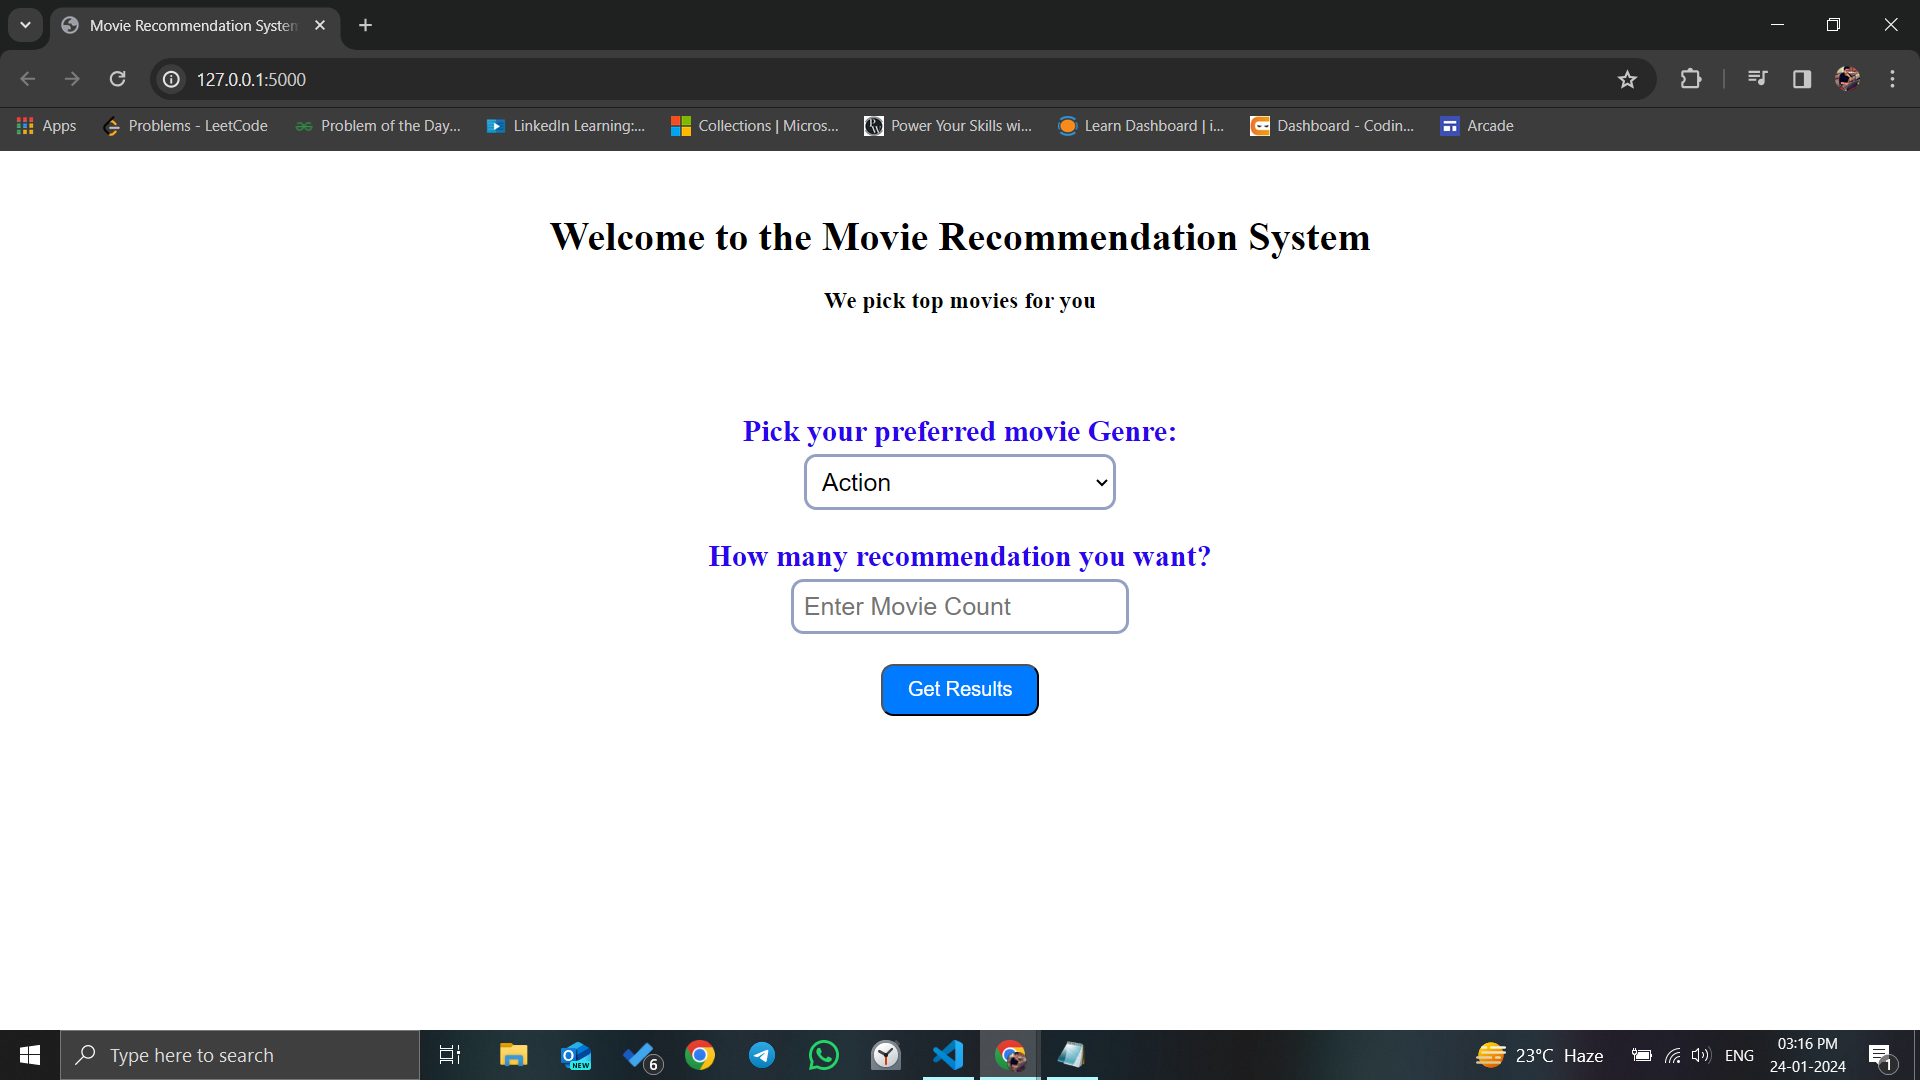

<br>

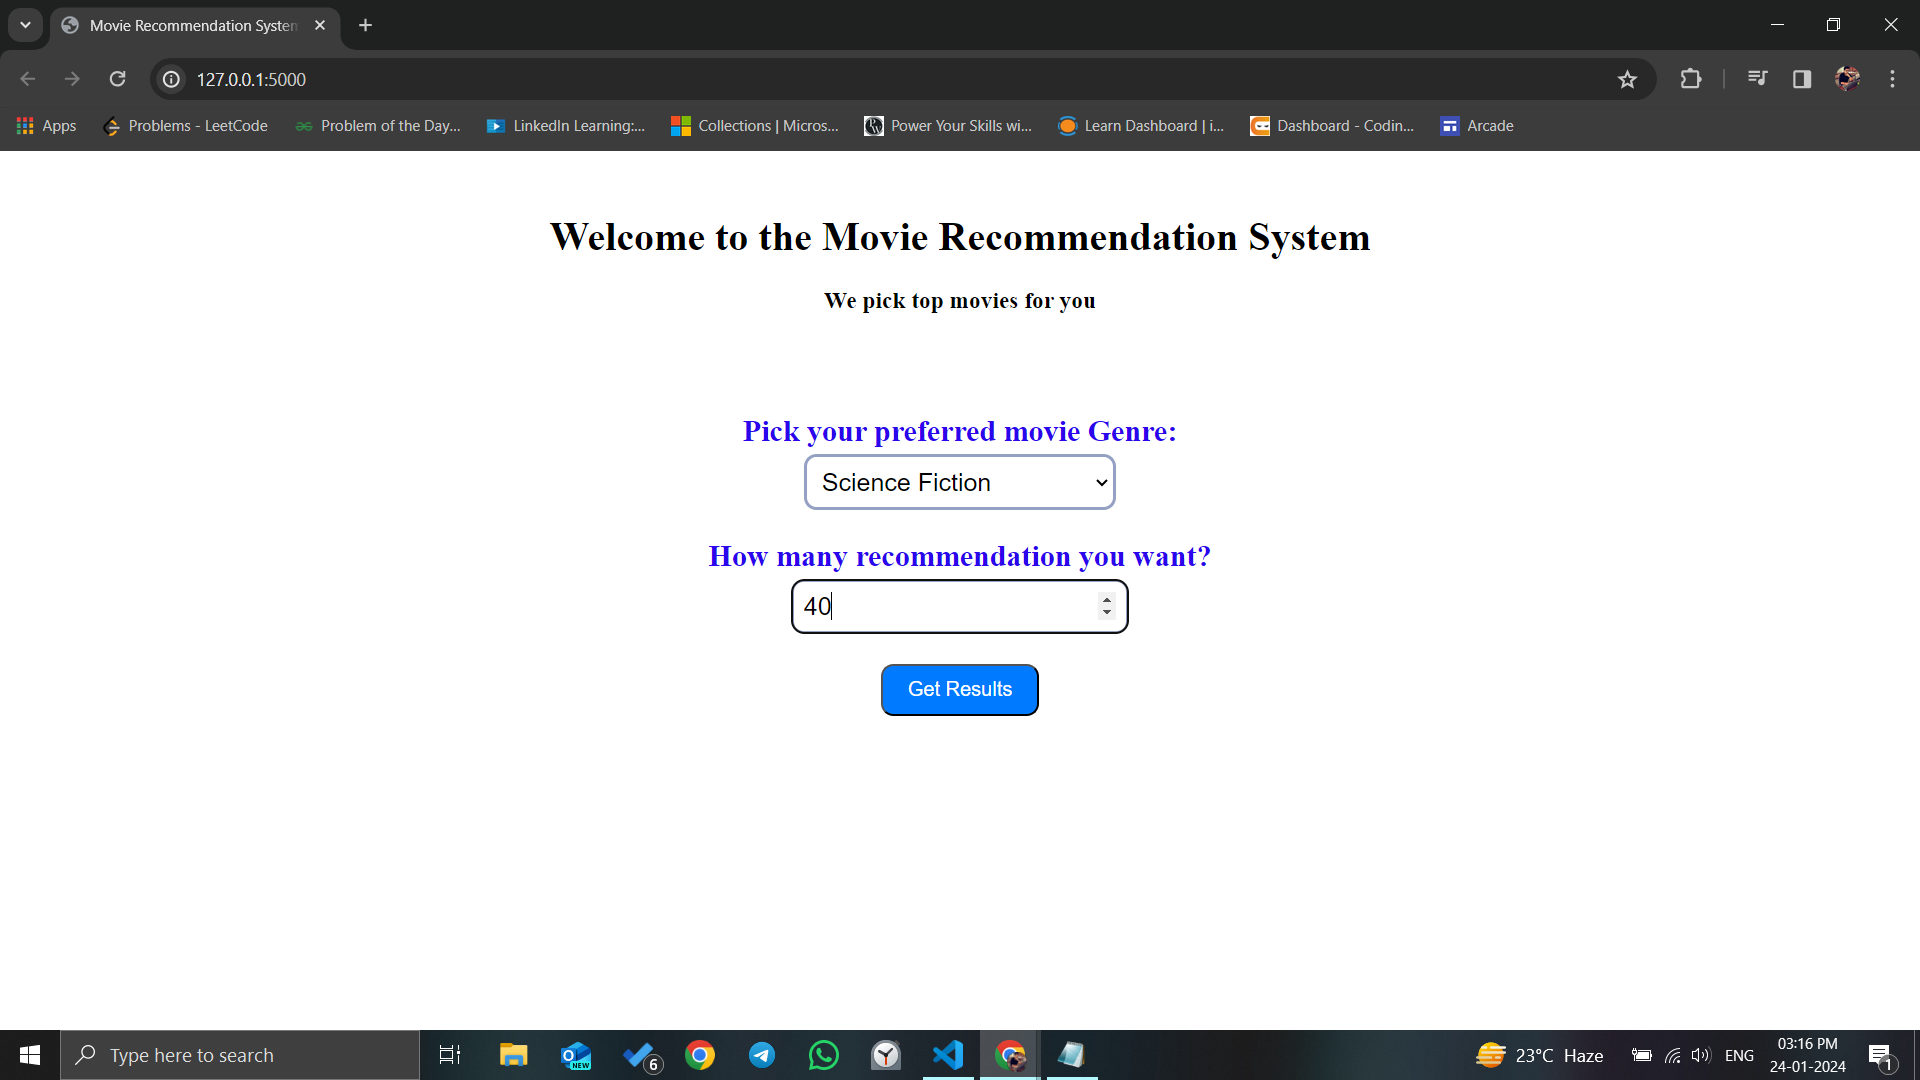

<br>

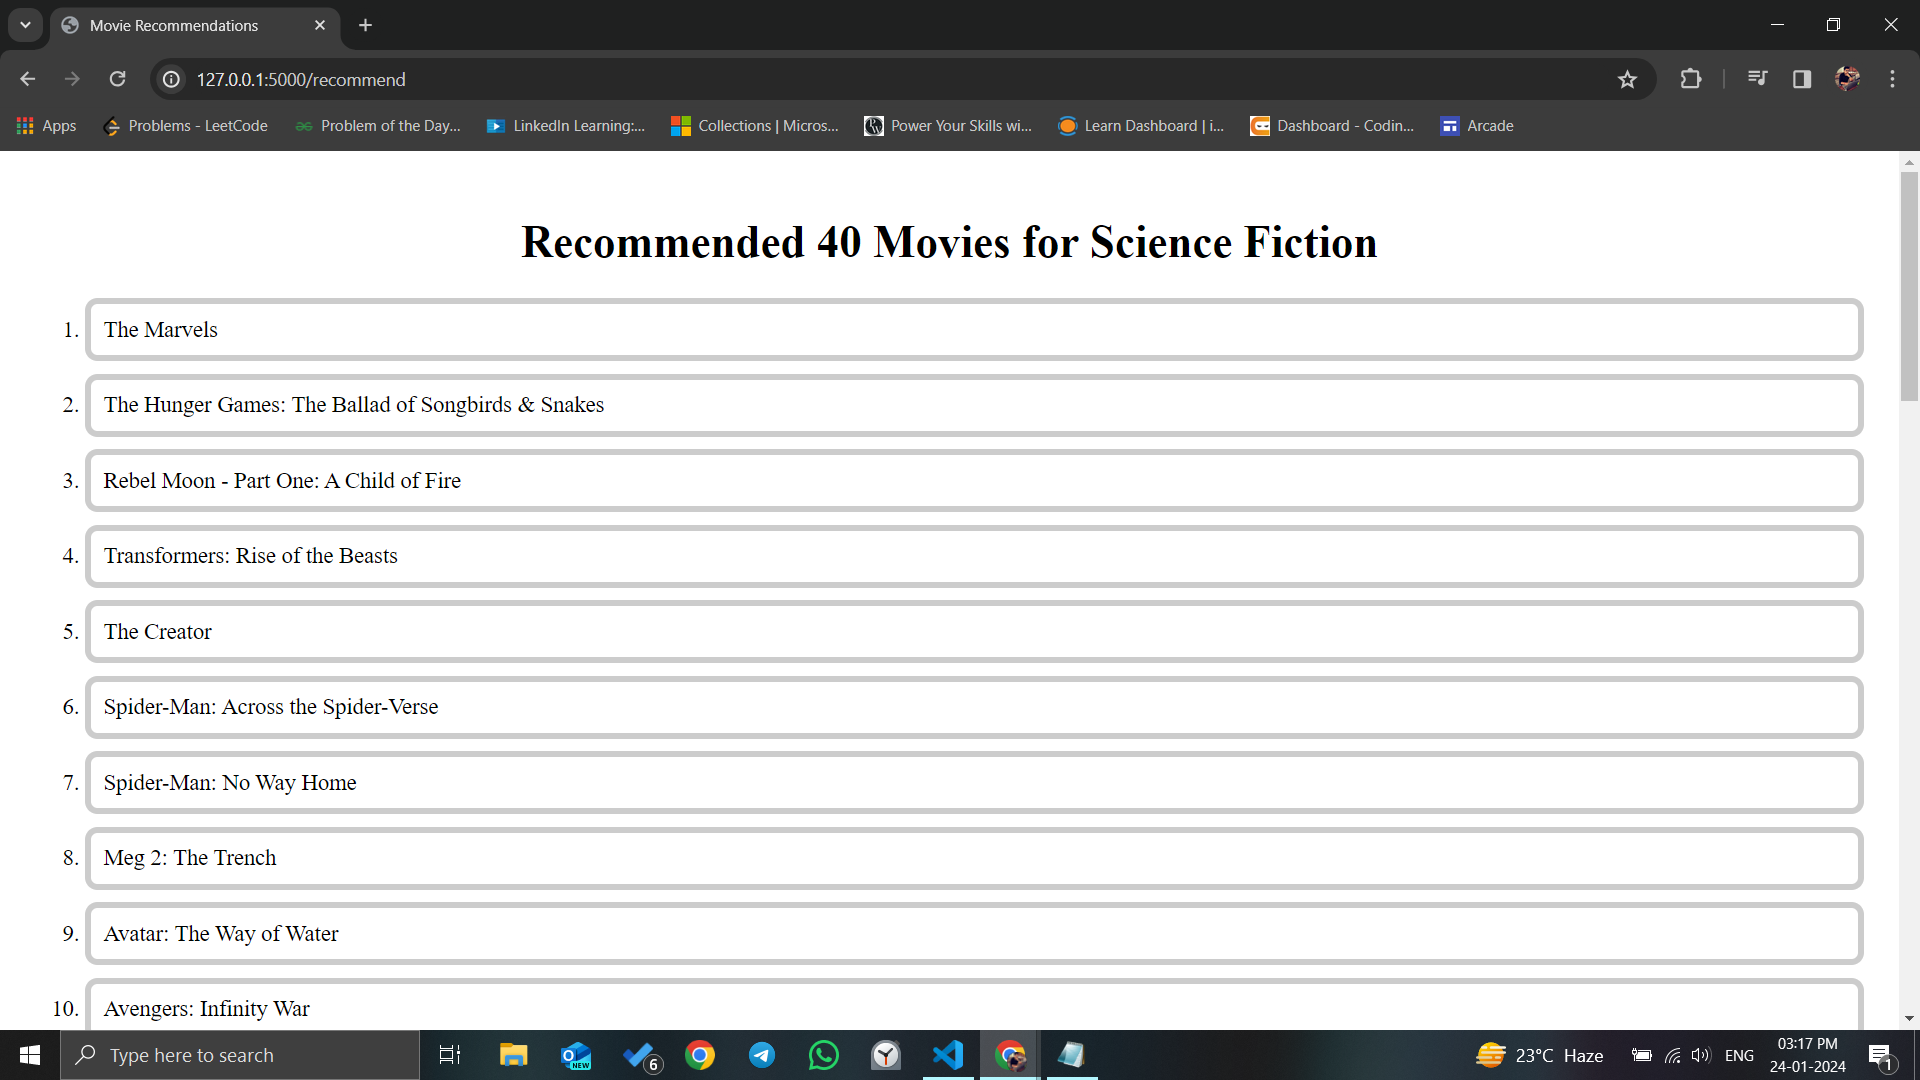

<br>

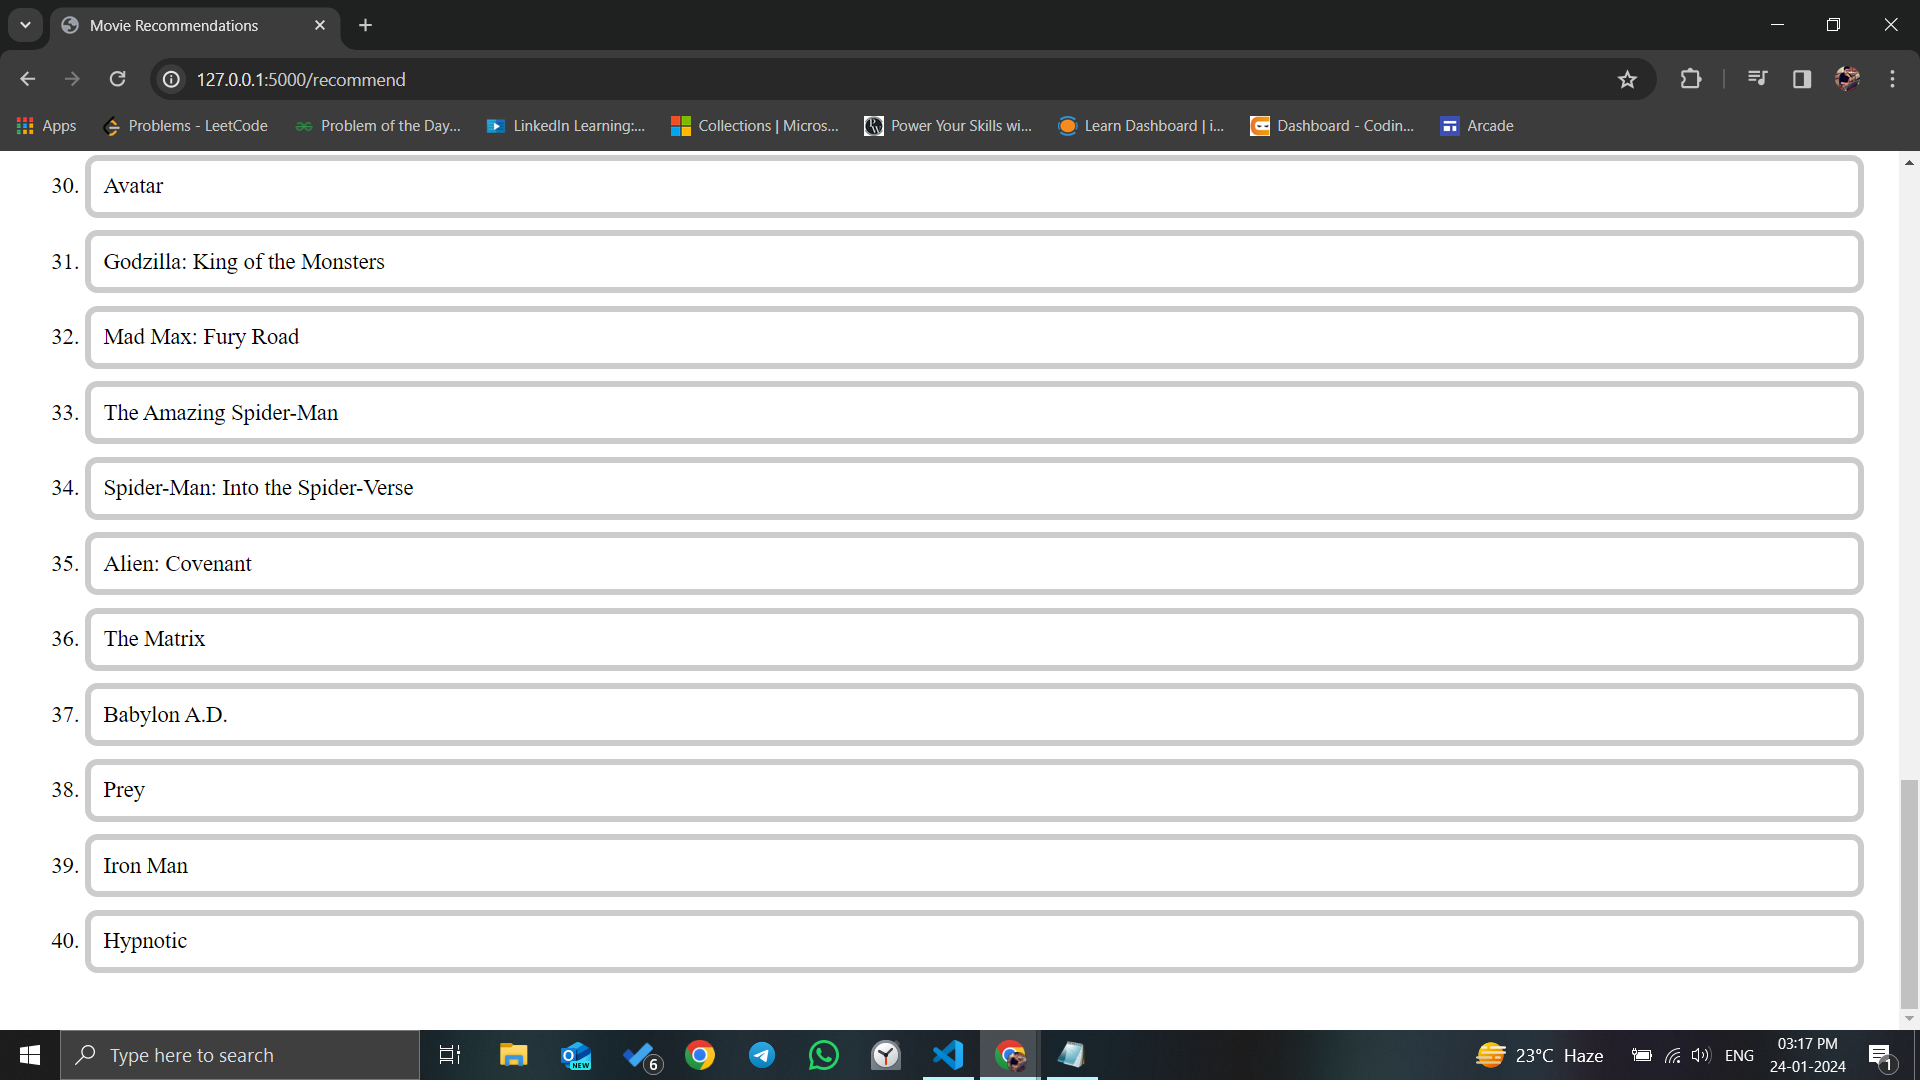
</div>